# **🇮🇷 Iran Economic Indicators Analysis (1960–2024) 📊** 

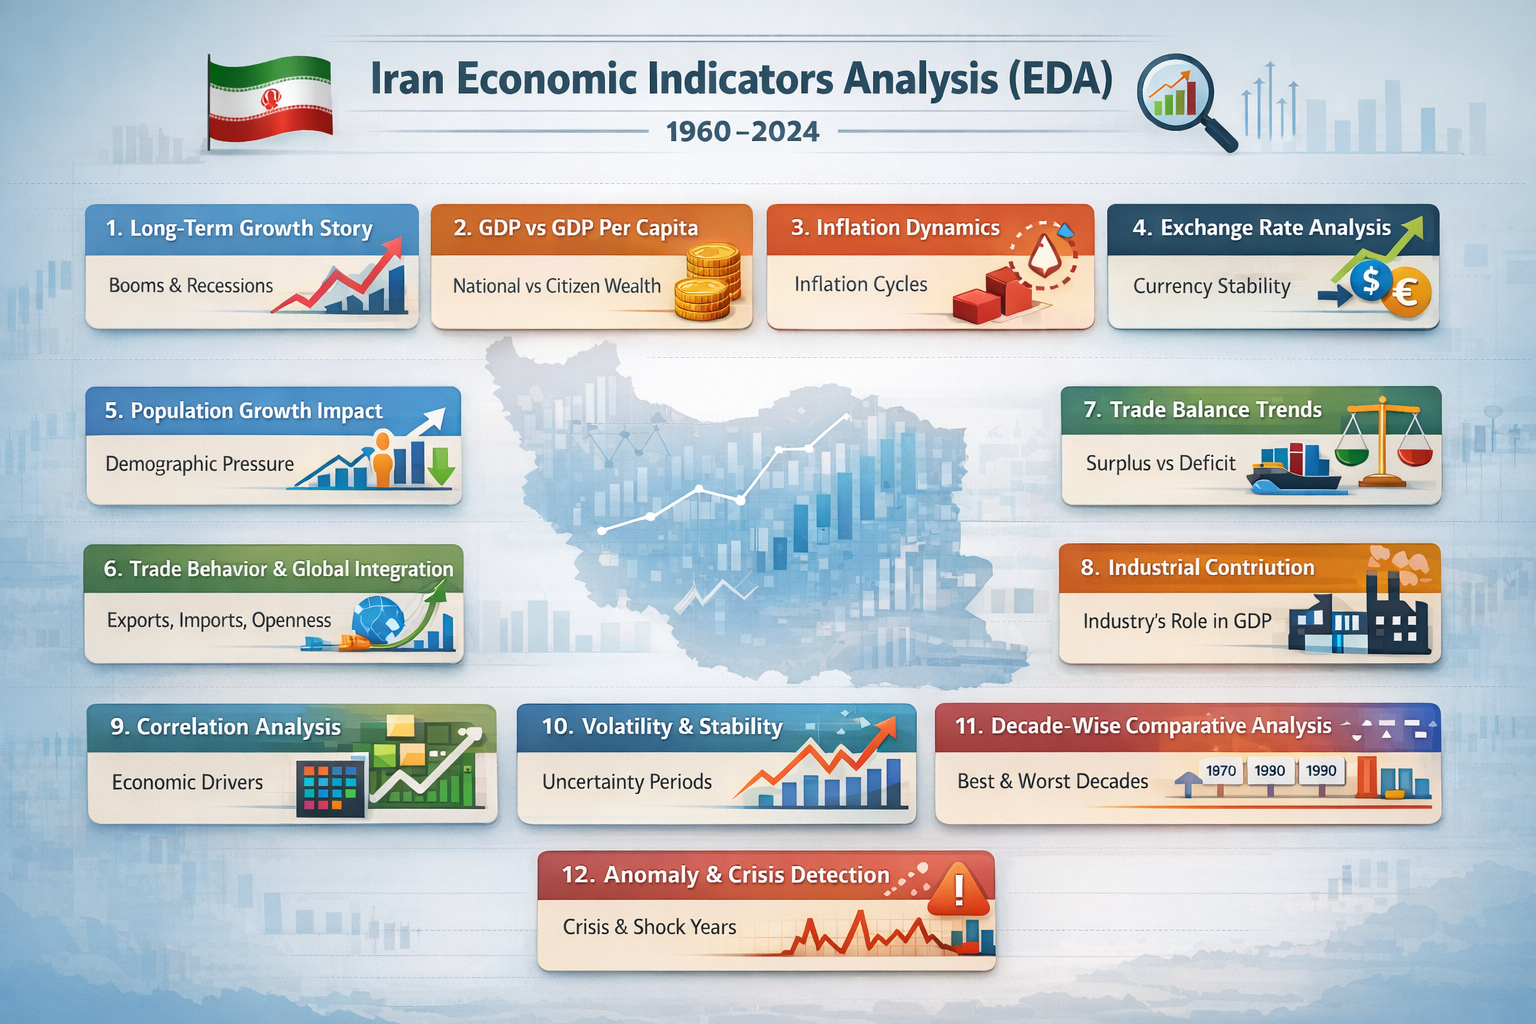

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/iran-thumbnail/thumbnail.png'))



## **📝 Introduction**  

Welcome to this **comprehensive Exploratory Data Analysis (EDA) of Iran’s economic indicators**! This notebook aims to provide **a full macroeconomic story spanning more than six decades**, highlighting trends, anomalies, and structural shifts in Iran’s economy.  

Economic analysis is more than just numbers – it’s about **understanding the narrative behind growth, crises, and resilience**. Through this notebook, you will explore:  

- 🕰️ **Long-term growth trends** and economic cycles  
- 💰 **GDP vs GDP per capita** to assess citizen-level prosperity  
- 📉 **Inflation dynamics** and periods of economic stress  
- 💱 **Exchange rate behavior** and its link with economic growth  
- 👥 **Population growth pressure** and its impact on GDP per capita  
- 📦 **Trade behavior & global integration**  
- ⚖️ **Trade balance evolution** and hidden insights  
- 🏭 **Industrial contribution to GDP** and structural transformations  
- 🔗 **Correlation & dependency analysis** to identify key drivers  
- 📊 **Volatility & stability analysis** to uncover uncertainty periods  
- 🧪 **Decade-wise comparative analysis** for long-term evaluation  
- 🚨 **Anomaly & crisis year detection** for highlighting economic shocks  

This notebook is designed to be **beginner-friendly but visually advanced**, making it perfect for Kaggle readers who want to understand **Iran’s economic story** over time.  

---

## **📂 Dataset Overview** 

The dataset used in this analysis was **scraped from the World Bank database**, covering **key macroeconomic indicators of Iran** from **1960 to 2024**. It contains **65 yearly records** and **13 main features**, providing a rich perspective on Iran’s economy.  

| Column | Description |
|--------|-------------|
| `Year` | Calendar year (1960–2024) |
| `GDP_Current_USD` | Gross Domestic Product in current US dollars |
| `GDP_Growth_Percent` | Annual GDP growth rate (%) |
| `GDP_Per_Capita_USD` | GDP per person in USD |
| `Inflation_Rate_Percent` | Annual consumer inflation rate (%) |
| `Official_Exchange_Rate` | Official currency exchange rate (IRR per USD) |
| `Population_Total` | Total population of Iran |
| `Population_Growth_Percent` | Annual population growth rate (%) |
| `Exports_USD` | Total exports in USD |
| `Imports_USD` | Total imports in USD |
| `Trade_Percent_GDP` | Trade as percentage of GDP |
| `Industry_Value_Added_Percent_GDP` | Industrial sector contribution to GDP (%) |
| `Trade_Balance` | Derived feature: Exports − Imports (USD) |

### **🔍 Key Characteristics of the Dataset**

- **Time span:** 1960–2024 (65 years)  
- **Data types:** Mix of `float` (economic metrics) and `int` (year, population)  
- **Missing values:** Only a few missing entries in `GDP_Growth_Percent`, `Official_Exchange_Rate`, and `Population_Growth_Percent` (handled before analysis)  
- **Derived features:** `Trade_Balance` created for richer insights  

---

## **🎯 Purpose of Analysis** 

This EDA aims to answer **critical questions about Iran’s economy**:

1. How has Iran’s GDP evolved over the decades? 🕰️  
2. Did GDP growth translate into higher individual living standards? 💰  
3. When did inflation spike, and how did it affect economic stability? 📉  
4. How stable has the currency been, and what was the impact on growth? 💱  
5. How does population growth affect per-capita prosperity? 👥  
6. Is Iran becoming more globally integrated in trade? 📦  
7. Which sectors drive economic growth, and how has industrialization evolved? 🏭  
8. What are the strongest drivers and correlations among indicators? 🔗  
9. Which decades were most stable vs volatile? 📊  
10. What are the major anomalies and crisis years in Iran’s economic history? 🚨  

---

## **🌟 Why This Notebook Is Special**

- **Advanced visualization:** Rolling means, heatmaps, anomaly highlights, and decade-wise comparisons  
- **Feature engineering inside EDA:** `Trade_Balance` and volatility metrics  
- **Narrative-driven analysis:** Every plot tells a story – not just numbers  
- **Professional insights:** Useful for researchers, students, and Kaggle enthusiasts  

---

> ⚡ **Pro Tip:** Combining historical data with derived metrics like rolling averages, volatility, and decade-wise summaries provides both **macro and micro-level insights** — the kind of analysis that Kaggle readers love and learn from.


# 📚 **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/kaggle/input/iran-economic-indicators-1960-2024/data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        65 non-null     int64  
 1   Year                              65 non-null     int64  
 2   GDP_Current_USD                   65 non-null     float64
 3   GDP_Growth_Percent                64 non-null     float64
 4   GDP_Per_Capita_USD                65 non-null     float64
 5   Inflation_Rate_Percent            65 non-null     float64
 6   Official_Exchange_Rate            64 non-null     float64
 7   Population_Total                  65 non-null     int64  
 8   Population_Growth_Percent         64 non-null     float64
 9   Exports_USD                       65 non-null     float64
 10  Imports_USD                       65 non-null     float64
 11  Trade_Percent_GDP                 65 non-null     float64
 12  Industry_V

# 🔍 **Explore the Dataset**

In [6]:
df.sample(10)

Unnamed: 0  Year  GDP_Current_USD  GDP_Growth_Percent  GDP_Per_Capita_USD  \
15          15  1975     5.177622e+10           -0.326216         1531.706171   
28          28  1988     1.230579e+11           -6.081997         2234.462351   
9            9  1969     9.743090e+09           15.516659          344.601687   
8            8  1968     8.623173e+09           14.404183          314.285457   
54          54  2014     4.622848e+11            4.984775         5672.063729   
16          16  1976     6.805530e+10           18.260436         1953.519697   
46          46  2006     2.656022e+11            4.999795         3618.916014   
11          11  1971     1.373180e+10           13.701583          457.283638   
57          57  2017     5.102399e+11            3.026855         6000.933464   
43          43  2003     1.519112e+11            8.639298         2208.996366   

    Inflation_Rate_Percent  Official_Exchange_Rate  Population_Total  \
15               12.879182               67.654946          33802973   
28               28.670635               68.699765          55072694   
9                 3.593195               75.750000          28273482   
8                 0.690361               75.750000          27437391   
54               16.606553            25941.664145          81502045   
16               11.256143               70.239070          34837271   
46               10.015898             9170.942877          73392747   
11                4.195298               75.750000          30029071   
57                8.044924            33226.298152          85026754   
43               16.468012             8193.887519          68769340   

    Population_Growth_Percent   Exports_USD   Imports_USD  Trade_Percent_GDP  \
15                   3.022808  2.109143e+10  1.831837e+10          76.115623   
28                   3.227702  8.964963e+09  1.759582e+10          21.583979   
9                    3.001762  1.756492e+09  2.050926e+09          39.078143   
8                    2.992720  1.507260e+09  1.768850e+09          37.991940   
54                   1.343129  1.055427e+11  1.041100e+11          45.351420   
16                   3.013906  2.531998e+10  1.921206e+10          65.435081   
46                   2.154441  7.933281e+10  6.188086e+10          53.167359   
11                   2.987914  3.172764e+09  2.928006e+09          44.428030   
57                   1.438704  1.114003e+11  1.087972e+11          43.155693   
43                   1.108389  3.741189e+10  3.957535e+10          50.679106   

    Industry_Value_Added_Percent_GDP  
15                         56.732685  
28                         24.807213  
9                          38.538983  
8                          36.302945  
54                         39.228228  
16                         57.243023  
46                         48.259901  
11                         43.134837  
57                         36.141393  
43                         45.059950

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        65 non-null     int64  
 1   Year                              65 non-null     int64  
 2   GDP_Current_USD                   65 non-null     float64
 3   GDP_Growth_Percent                64 non-null     float64
 4   GDP_Per_Capita_USD                65 non-null     float64
 5   Inflation_Rate_Percent            65 non-null     float64
 6   Official_Exchange_Rate            64 non-null     float64
 7   Population_Total                  65 non-null     int64  
 8   Population_Growth_Percent         64 non-null     float64
 9   Exports_USD                       65 non-null     float64
 10  Imports_USD                       65 non-null     float64
 11  Trade_Percent_GDP                 65 non-null     float64
 12  Industry_V

In [8]:
for i in df.columns:
    print(i)

Unnamed: 0
Year
GDP_Current_USD
GDP_Growth_Percent
GDP_Per_Capita_USD
Inflation_Rate_Percent
Official_Exchange_Rate
Population_Total
Population_Growth_Percent
Exports_USD
Imports_USD
Trade_Percent_GDP
Industry_Value_Added_Percent_GDP


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.dtypes

Year                                  int64
GDP_Current_USD                     float64
GDP_Growth_Percent                  float64
GDP_Per_Capita_USD                  float64
Inflation_Rate_Percent              float64
Official_Exchange_Rate              float64
Population_Total                      int64
Population_Growth_Percent           float64
Exports_USD                         float64
Imports_USD                         float64
Trade_Percent_GDP                   float64
Industry_Value_Added_Percent_GDP    float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              65 non-null     int64  
 1   GDP_Current_USD                   65 non-null     float64
 2   GDP_Growth_Percent                64 non-null     float64
 3   GDP_Per_Capita_USD                65 non-null     float64
 4   Inflation_Rate_Percent            65 non-null     float64
 5   Official_Exchange_Rate            64 non-null     float64
 6   Population_Total                  65 non-null     int64  
 7   Population_Growth_Percent         64 non-null     float64
 8   Exports_USD                       65 non-null     float64
 9   Imports_USD                       65 non-null     float64
 10  Trade_Percent_GDP                 65 non-null     float64
 11  Industry_Value_Added_Percent_GDP  65 non-null     float64
dtypes: float64

# **EDA**

# **🕰️ 1. Long-Term Economic Growth Story (Time-Series Core)**

### **📈 1. GDP Over Time — Absolute Economic Expansion**

**🔍 Insight**

- Shows overall economic size growth
- Reveals long-term trend & stagnation phases
- Helps spot structural breaks

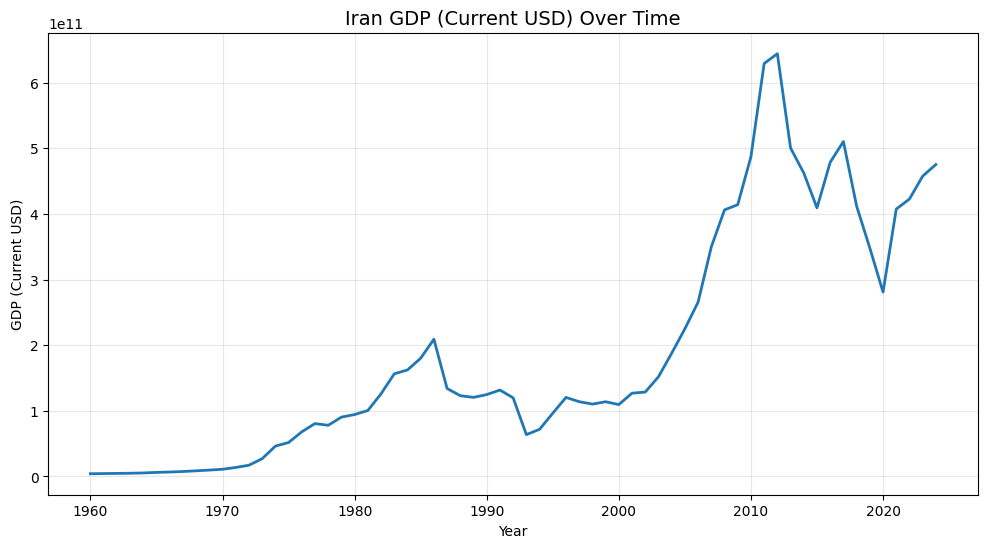

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_Current_USD"], linewidth=2)
plt.title("Iran GDP (Current USD) Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.grid(alpha=0.3)
plt.show()

### **📉 2. GDP Growth Rate — Booms vs Recessions**

**🔍 Insight**

- Directly shows economic cycles
- Negative values = recessions
- Volatility becomes visible

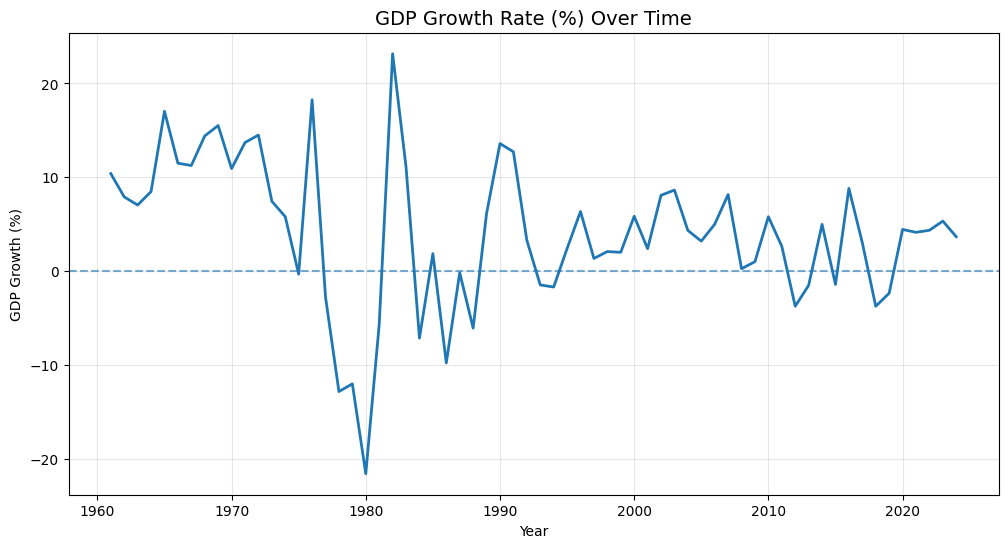

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)
plt.title("GDP Growth Rate (%) Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.grid(alpha=0.3)
plt.show()

### **🚨 3. Highlight Economic Crisis Years (Negative Growth)**

**🔍 Insight**

- Makes recessions visually obvious
- Excellent for storytelling

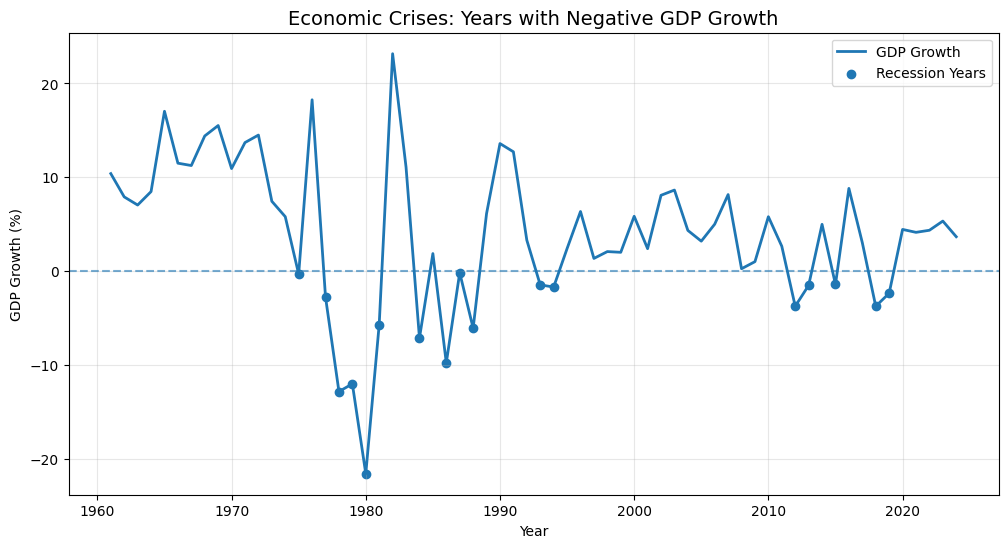

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["GDP_Growth_Percent"], label="GDP Growth", linewidth=2)
plt.scatter(
    df[df["GDP_Growth_Percent"] < 0]["Year"],
    df[df["GDP_Growth_Percent"] < 0]["GDP_Growth_Percent"],
    label="Recession Years"
)

plt.axhline(0, linestyle="--", alpha=0.6)
plt.title("Economic Crises: Years with Negative GDP Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📊 4. Growth Stability vs Volatility (Rolling Mean)**
**🔍 Insight**

- Separates short-term noise from long-term trend
- Shows stability improvement or deterioration

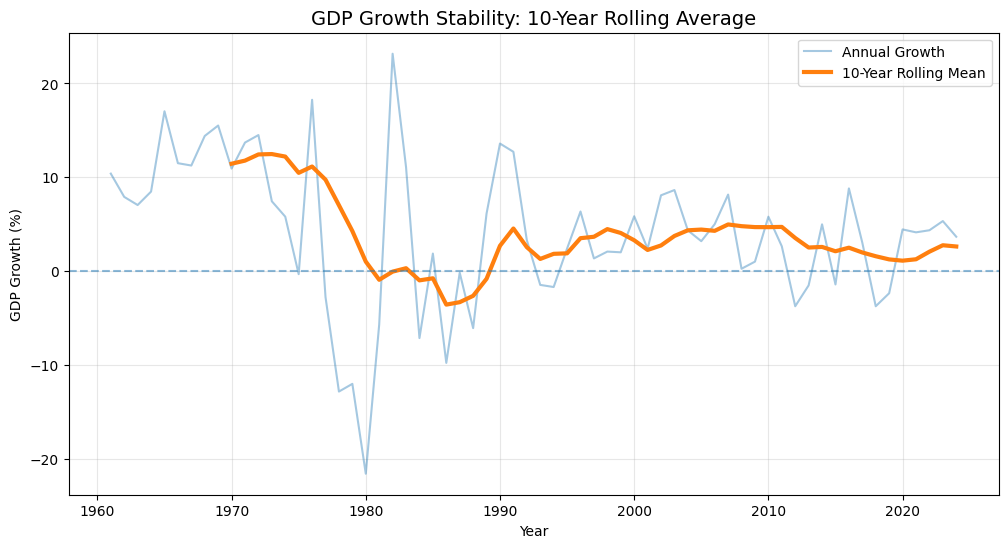

In [15]:
df["GDP_Growth_Rolling_10Y"] = df["GDP_Growth_Percent"].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_Growth_Percent"], alpha=0.4, label="Annual Growth")
plt.plot(df["Year"], df["GDP_Growth_Rolling_10Y"], linewidth=3, label="10-Year Rolling Mean")
plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("GDP Growth Stability: 10-Year Rolling Average", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **🔍 5. Structural Break Detection (Visual Regime Shifts)**
**🔍 Insight**

- Sudden trend changes
- Long stagnation vs recovery periods
- Policy or shock-driven shifts

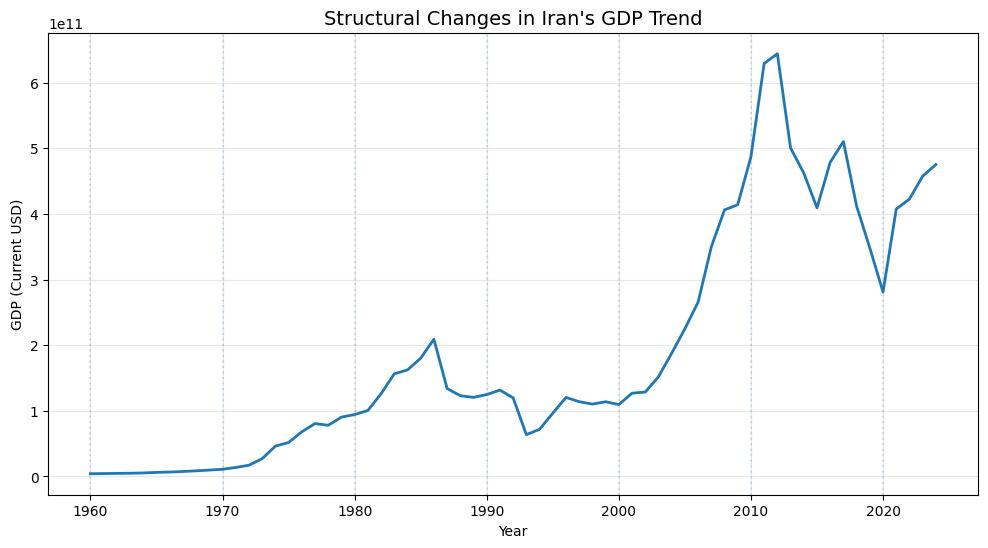

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_Current_USD"], linewidth=2)

# Mark decades visually
for year in range(df["Year"].min(), df["Year"].max(), 10):
    plt.axvline(year, linestyle=":", alpha=0.2)

plt.title("Structural Changes in Iran's GDP Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP (Current USD)")
plt.grid(alpha=0.3)
plt.show()

### **🧠 6. Early vs Recent Decades Comparison**
**🔍 Insight**

- Are recent decades more volatile?
- Has growth become more stable or unstable?

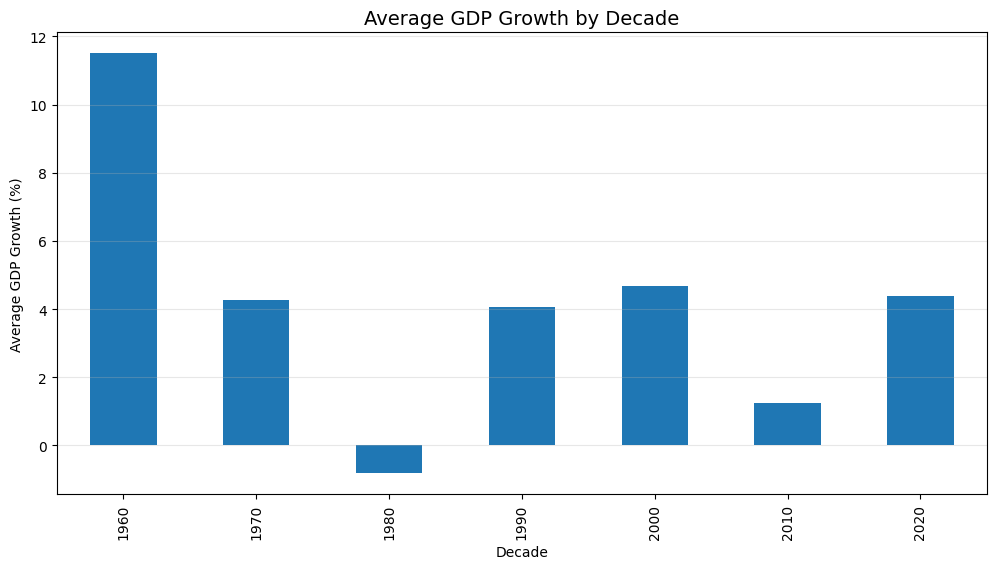

In [17]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.groupby("Decade")["GDP_Growth_Percent"].mean().plot(kind="bar")
plt.title("Average GDP Growth by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average GDP Growth (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

# **💰 2. GDP vs GDP per Capita (Population Effect)**

### **📈 1. GDP vs GDP per Capita (Side-by-Side Time Series)**

**🔍 Insight**

- GDP ↑ does NOT always mean people are better off
- Per-capita trend tells the real story

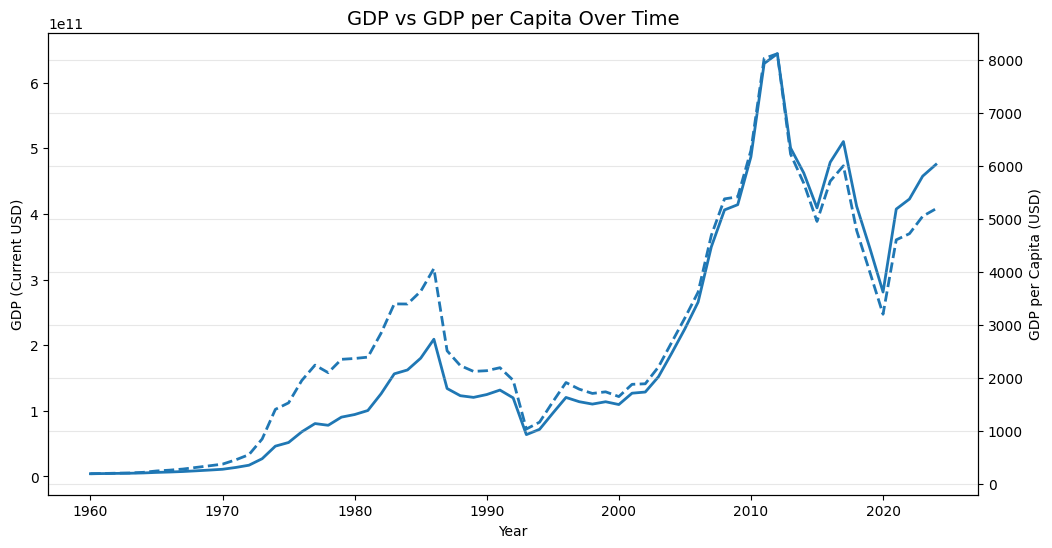

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Year"], df["GDP_Current_USD"], linewidth=2)
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (Current USD)")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.plot(df["Year"], df["GDP_Per_Capita_USD"], linewidth=2, linestyle="--")
ax2.set_ylabel("GDP per Capita (USD)")

plt.title("GDP vs GDP per Capita Over Time", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### **📉 2. Population Growth vs GDP per Capita**
**🔍 Insight**

- Shows demographic pressure
- High population growth can suppress per-capita gains

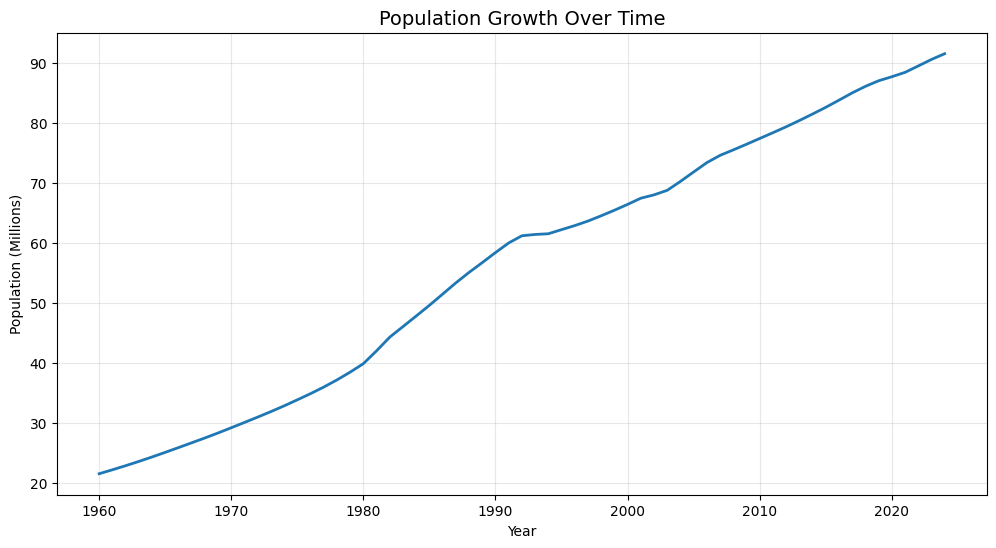

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Population_Total"] / 1e6, linewidth=2)
plt.title("Population Growth Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(alpha=0.3)
plt.show()

### **⚖️ 3. Divergence Detection: GDP ↑ but GDP per Capita ↓**
**🔍 Insight**

- This plot exposes economic illusion
- National wealth grows, individual wealth doesn’t

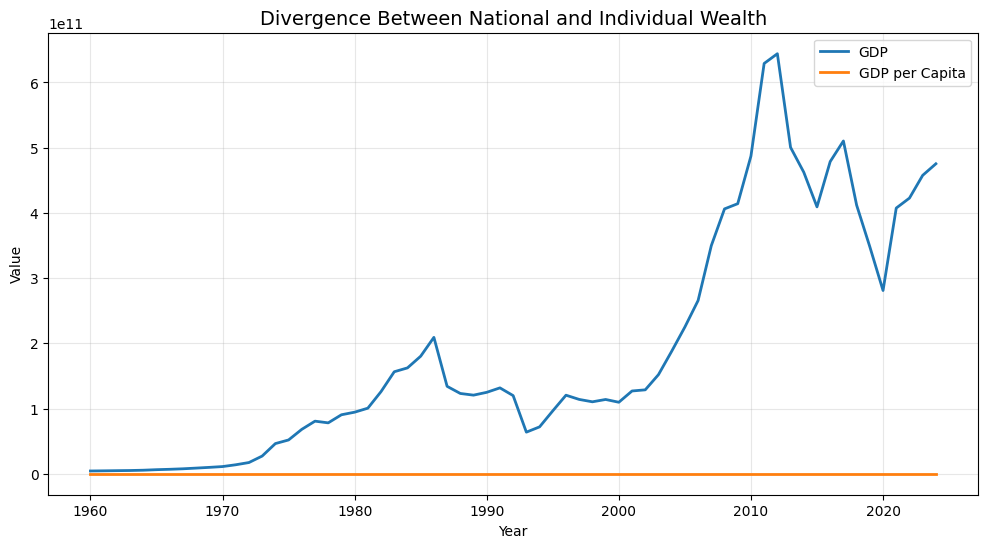

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["GDP_Current_USD"], label="GDP", linewidth=2)
plt.plot(df["Year"], df["GDP_Per_Capita_USD"], label="GDP per Capita", linewidth=2)

plt.title("Divergence Between National and Individual Wealth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **🔍 4. GDP vs GDP per Capita (Scatter Relationship)**
**🔍 Insight**

- Reveals non-linear relationship
- Shows whether higher GDP always means higher prosperity

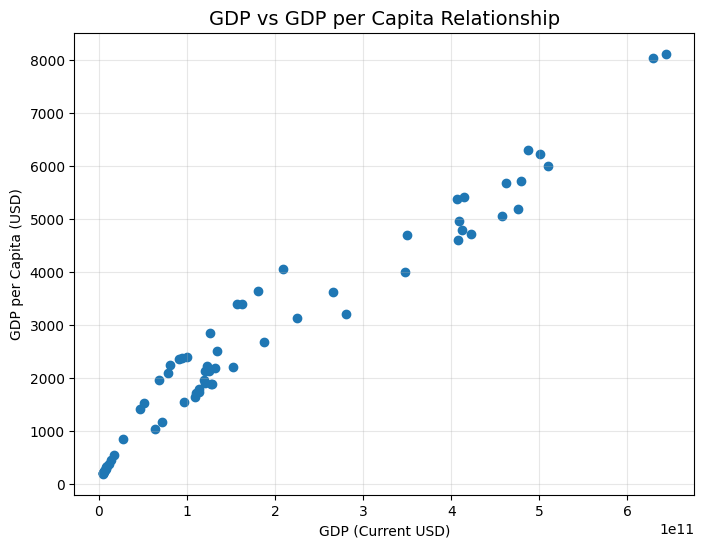

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df["GDP_Current_USD"], df["GDP_Per_Capita_USD"])
plt.title("GDP vs GDP per Capita Relationship", fontsize=14)
plt.xlabel("GDP (Current USD)")
plt.ylabel("GDP per Capita (USD)")
plt.grid(alpha=0.3)
plt.show()

### **📊 5. Decade-Wise Prosperity Comparison (Clean & Powerful)**
**🔍 Insight**

- Identifies best decades for citizens
- Removes yearly noise

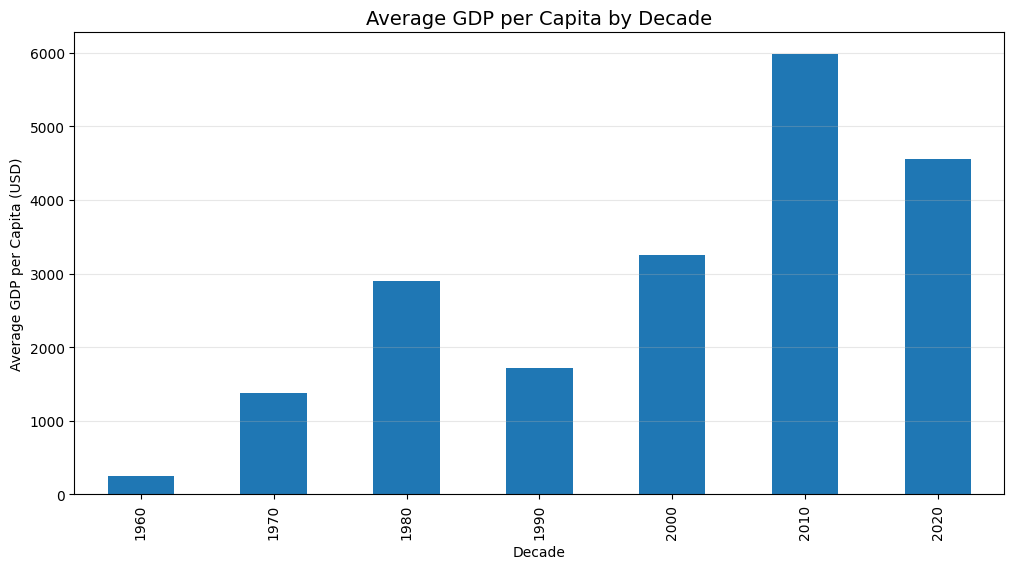

In [22]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.groupby("Decade")["GDP_Per_Capita_USD"].mean().plot(kind="bar")
plt.title("Average GDP per Capita by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average GDP per Capita (USD)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **🧠 6. Population Pressure Indicator (Advanced EDA Touch)**
**🔍 Insight**

- Measures economic dilution effect
- Higher values = GDP not keeping up with population

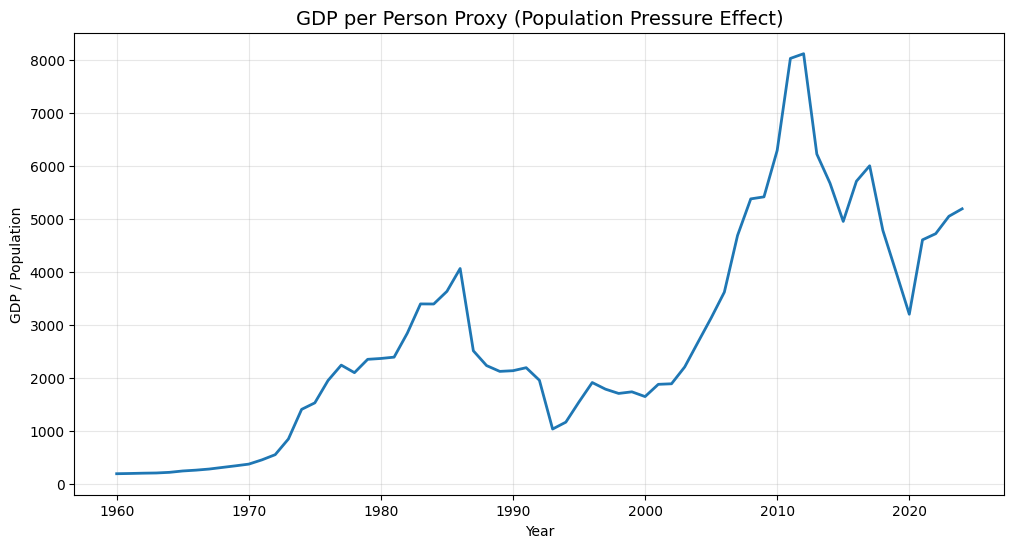

In [23]:
df["GDP_to_Population"] = df["GDP_Current_USD"] / df["Population_Total"]

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_to_Population"], linewidth=2)
plt.title("GDP per Person Proxy (Population Pressure Effect)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP / Population")
plt.grid(alpha=0.3)
plt.show()

# **📉 3. Inflation Dynamics & Economic Stress**

### **📈 1. Inflation Rate Over Time (Core Story)**
**🔍 Insight**

- Identifies inflationary regimes
- Clearly shows spikes, collapses, and persistence
- First signal of economic stress

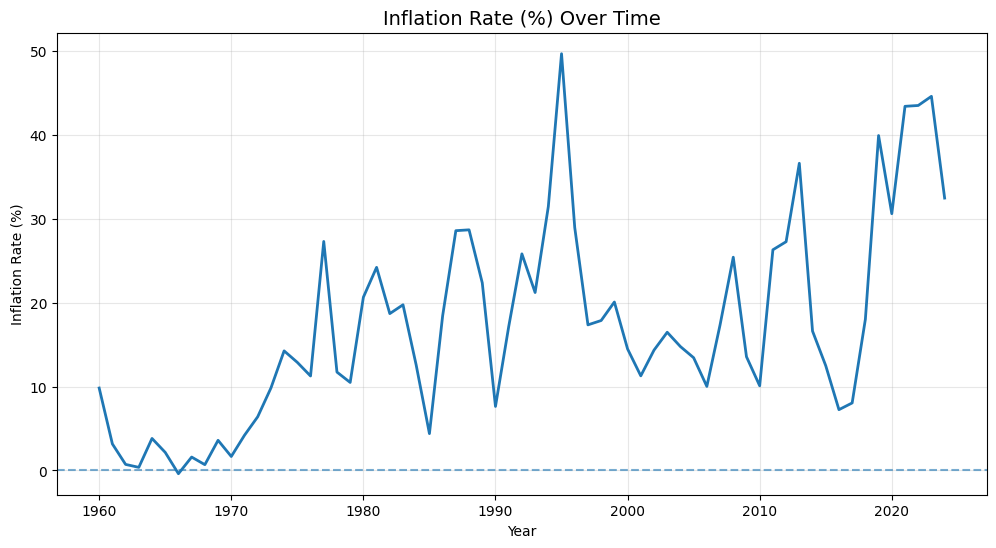

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Inflation_Rate_Percent"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)

plt.title("Inflation Rate (%) Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.grid(alpha=0.3)
plt.show()

### **🚨 2. Highlight High & Hyper-Inflation Periods**
**🔍 Insight**

- Makes extreme inflation years obvious
- Perfect for storytelling

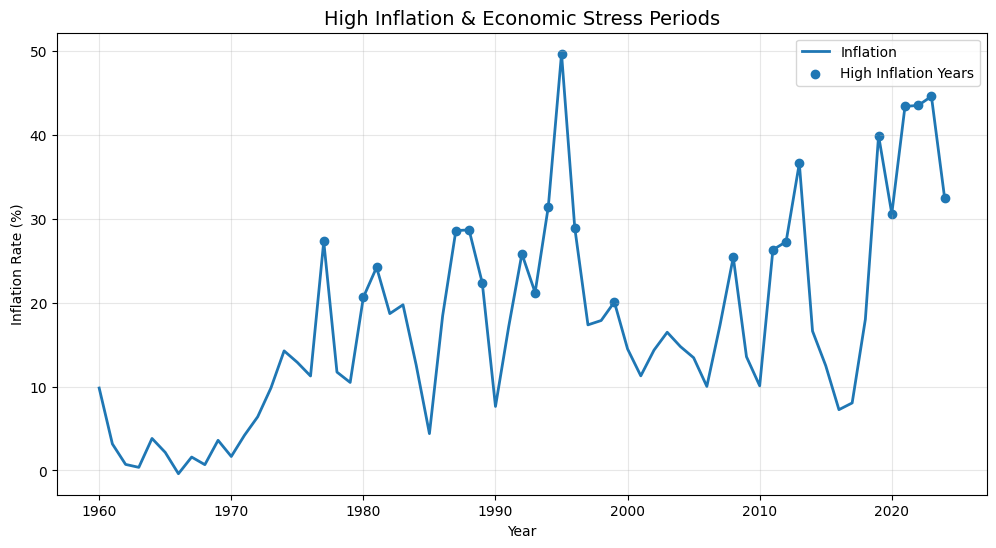

In [25]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["Inflation_Rate_Percent"], linewidth=2, label="Inflation")
plt.scatter(
    df[df["Inflation_Rate_Percent"] > 20]["Year"],
    df[df["Inflation_Rate_Percent"] > 20]["Inflation_Rate_Percent"],
    label="High Inflation Years"
)

plt.title("High Inflation & Economic Stress Periods", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **🔁 3. Long Inflation Cycles (Rolling Mean)**
**🔍 Insight**

- Distinguishes short-term shocks from long-term inflation regimes
- Shows persistence (or lack of control)

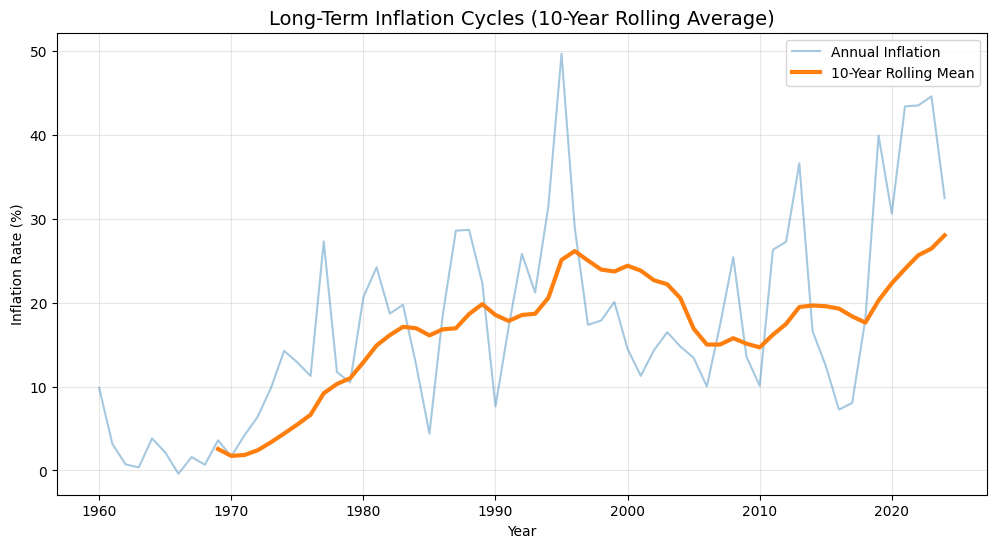

In [26]:
df["Inflation_Rolling_10Y"] = df["Inflation_Rate_Percent"].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Inflation_Rate_Percent"], alpha=0.4, label="Annual Inflation")
plt.plot(df["Year"], df["Inflation_Rolling_10Y"], linewidth=3, label="10-Year Rolling Mean")

plt.title("Long-Term Inflation Cycles (10-Year Rolling Average)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📉 4. Inflation Spikes vs GDP Growth (Economic Stress Link)**
**🔍 Insight**

- Shows whether inflation spikes coincide with GDP slowdowns
- Reveals stagflation-like patterns

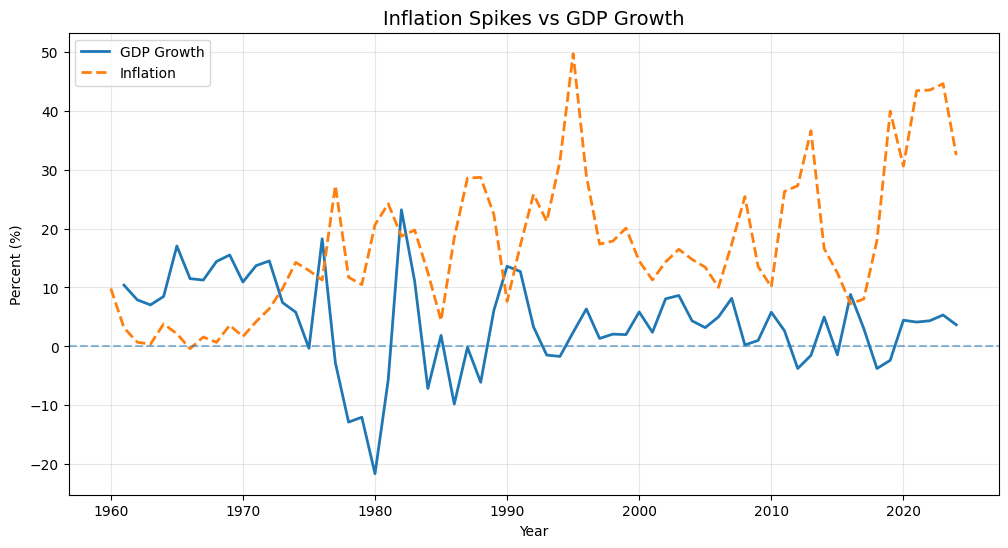

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")
plt.plot(df["Year"], df["Inflation_Rate_Percent"], linewidth=2, linestyle="--", label="Inflation")

plt.axhline(0, linestyle="--", alpha=0.5)

plt.title("Inflation Spikes vs GDP Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📦 5. Inflation Volatility Across Decades (Boxplot)**
**🔍 Insight**

- Which decades were most unstable?
- Helps compare macroeconomic stability

<Figure size 1200x600 with 0 Axes>

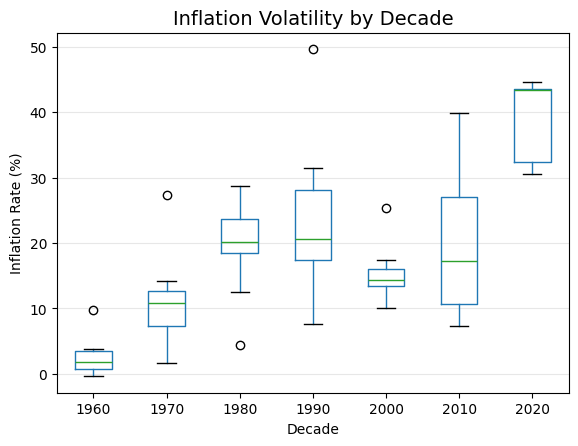

In [28]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.boxplot(
    column="Inflation_Rate_Percent",
    by="Decade",
    grid=False
)

plt.title("Inflation Volatility by Decade", fontsize=14)
plt.suptitle("")
plt.xlabel("Decade")
plt.ylabel("Inflation Rate (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **📊 6. Inflation Distribution (Stress Concentration)**
**🔍 Insight**

- Shows skewness toward high inflation
- Reveals extreme outliers

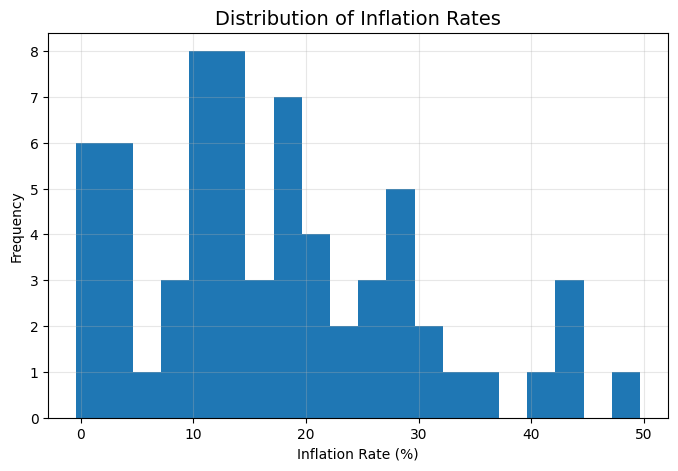

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(df["Inflation_Rate_Percent"], bins=20)
plt.title("Distribution of Inflation Rates", fontsize=14)
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# **💱 4. Exchange Rate Stability vs Economic Growth**

### **📉 1. Official Exchange Rate Over Time (Currency Weakening Story)**
**🔍 Insight**

- Long-term depreciation trend
- Sudden jumps = devaluation episodes
- Structural instability

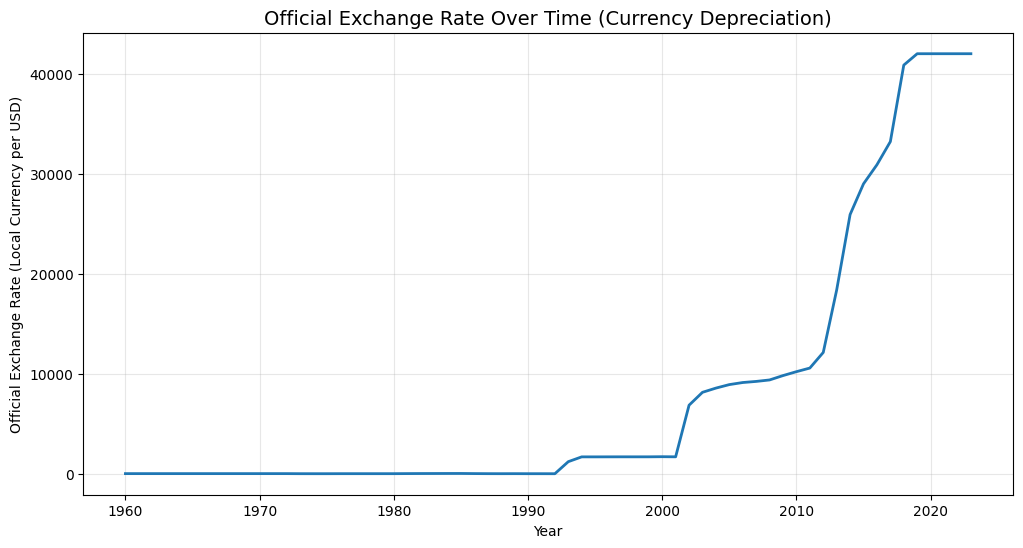

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Official_Exchange_Rate"], linewidth=2)

plt.title("Official Exchange Rate Over Time (Currency Depreciation)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Official Exchange Rate (Local Currency per USD)")
plt.grid(alpha=0.3)
plt.show()

### **🚨 2. Detect Sudden Devaluation Periods (Rate of Change)**
**🔍 Insight**

- Highlights shock years
- Makes regime changes obvious

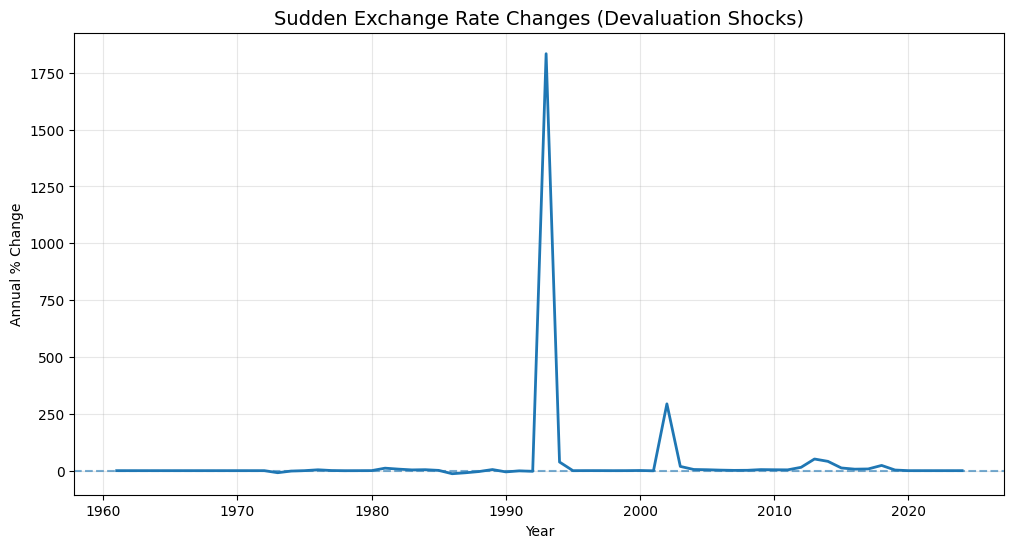

In [31]:
df["Exchange_Rate_Change"] = df["Official_Exchange_Rate"].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Exchange_Rate_Change"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)

plt.title("Sudden Exchange Rate Changes (Devaluation Shocks)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Annual % Change")
plt.grid(alpha=0.3)
plt.show()

### **📊 3. Exchange Rate vs GDP Growth (Economic Impact)**
**🔍 Insight**

- Depreciation often coincides with growth slowdowns
- Reveals stress periods

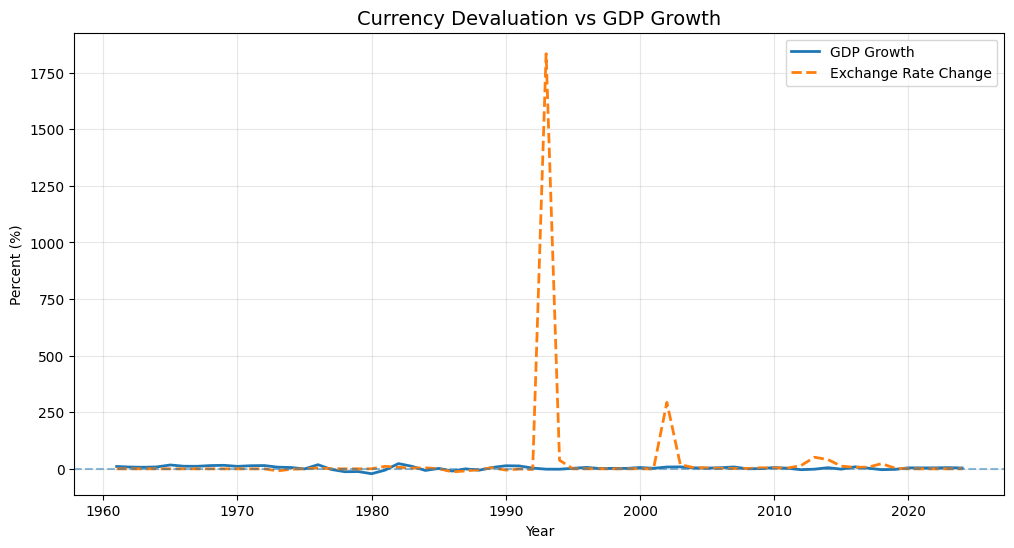

In [32]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")
plt.plot(df["Year"], df["Exchange_Rate_Change"], linewidth=2, linestyle="--", label="Exchange Rate Change")

plt.axhline(0, linestyle="--", alpha=0.5)

plt.title("Currency Devaluation vs GDP Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **🔄 4. Exchange Rate vs Inflation (Classic Macro Link)**
**🔍 Insight**

- Currency depreciation → imported inflation
- Shows macroeconomic transmission

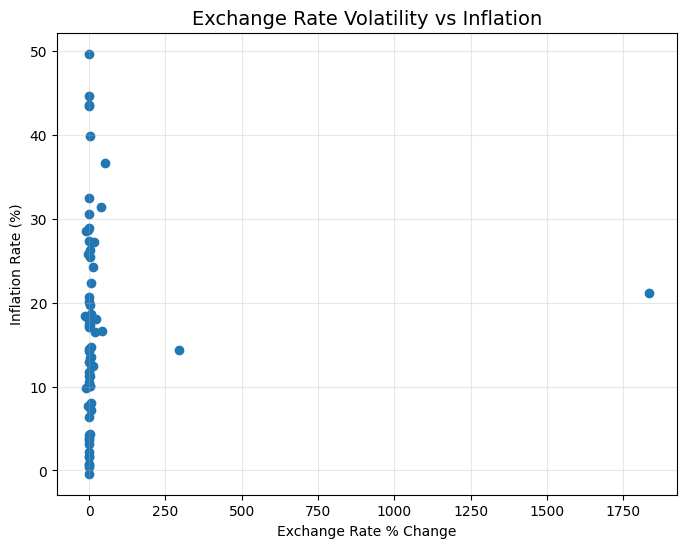

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Exchange_Rate_Change"], df["Inflation_Rate_Percent"])
plt.title("Exchange Rate Volatility vs Inflation", fontsize=14)
plt.xlabel("Exchange Rate % Change")
plt.ylabel("Inflation Rate (%)")
plt.grid(alpha=0.3)
plt.show()

### **📦 5. Exchange Rate Volatility Across Decades**
**🔍 Insight**

- Which decades were most unstable?
- Shows macroeconomic fragility

<Figure size 1200x600 with 0 Axes>

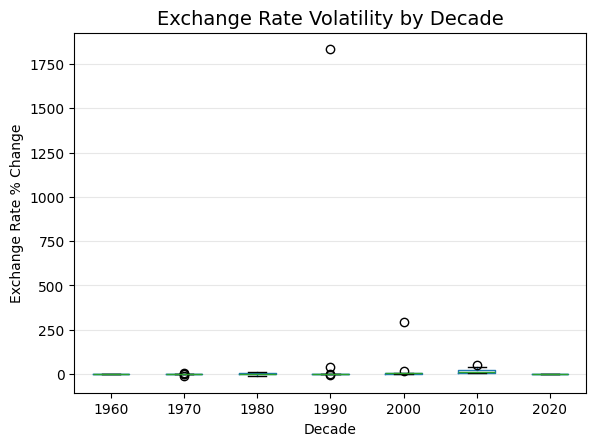

In [34]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.boxplot(
    column="Exchange_Rate_Change",
    by="Decade",
    grid=False
)

plt.title("Exchange Rate Volatility by Decade", fontsize=14)
plt.suptitle("")
plt.xlabel("Decade")
plt.ylabel("Exchange Rate % Change")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **🔍 6. Exchange Rate vs GDP Growth (Direct Relationship)**
**🔍 Insight**

- Tests whether depreciation helps or hurts growth

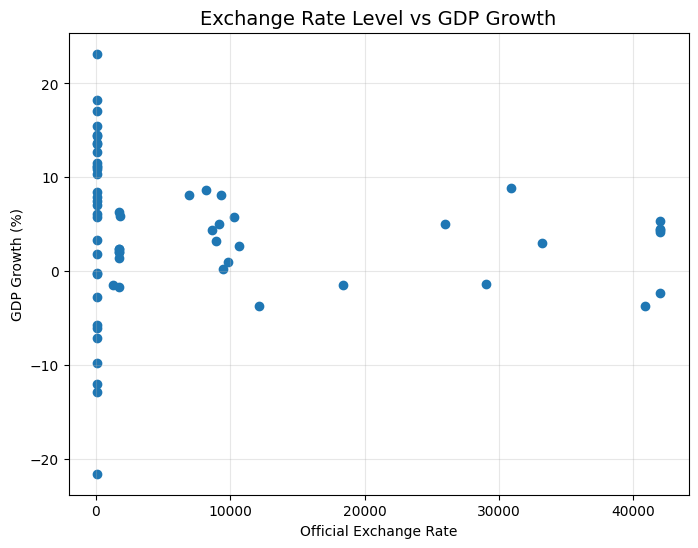

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Official_Exchange_Rate"], df["GDP_Growth_Percent"])
plt.title("Exchange Rate Level vs GDP Growth", fontsize=14)
plt.xlabel("Official Exchange Rate")
plt.ylabel("GDP Growth (%)")
plt.grid(alpha=0.3)
plt.show()

# **👥 5. Population Growth Pressure on the Economy**

### **📈 1. Total Population Over Time (Demographic Expansion)**
**🔍 Insight**

- Reveals long-term demographic pressure
- Shows whether population growth is stabilizing or accelerating

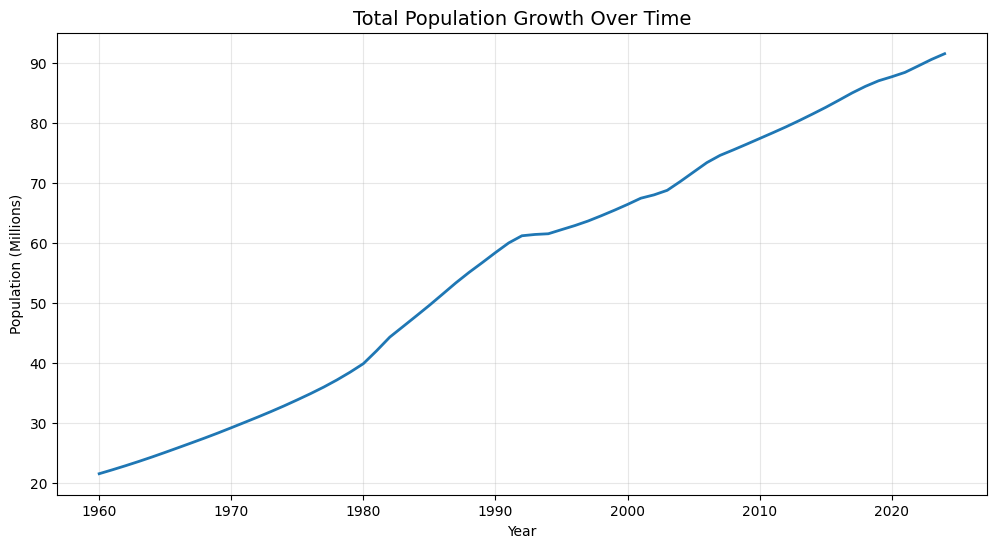

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Population_Total"] / 1e6, linewidth=2)

plt.title("Total Population Growth Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(alpha=0.3)
plt.show()

### **📉 2. Population Growth Rate Over Time (Growth Phases)**
**🔍 Insight**

- Identifies acceleration and deceleration phases
- Signals demographic transition

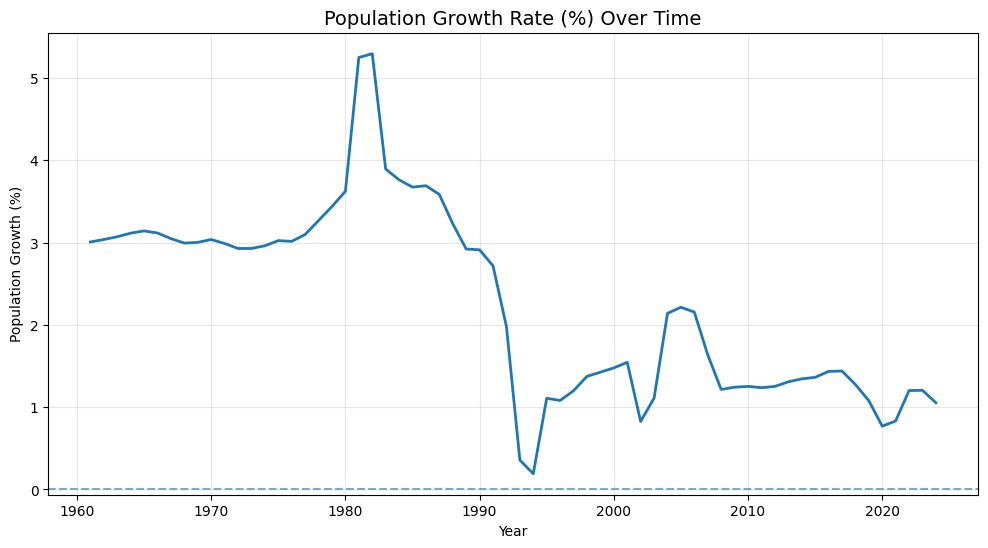

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Population_Growth_Percent"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)

plt.title("Population Growth Rate (%) Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population Growth (%)")
plt.grid(alpha=0.3)
plt.show()

### **🔁 3. Long-Term Population Growth Trend (Rolling Mean)**
**🔍 Insight**

- Removes yearly noise
- Shows demographic transition clearly

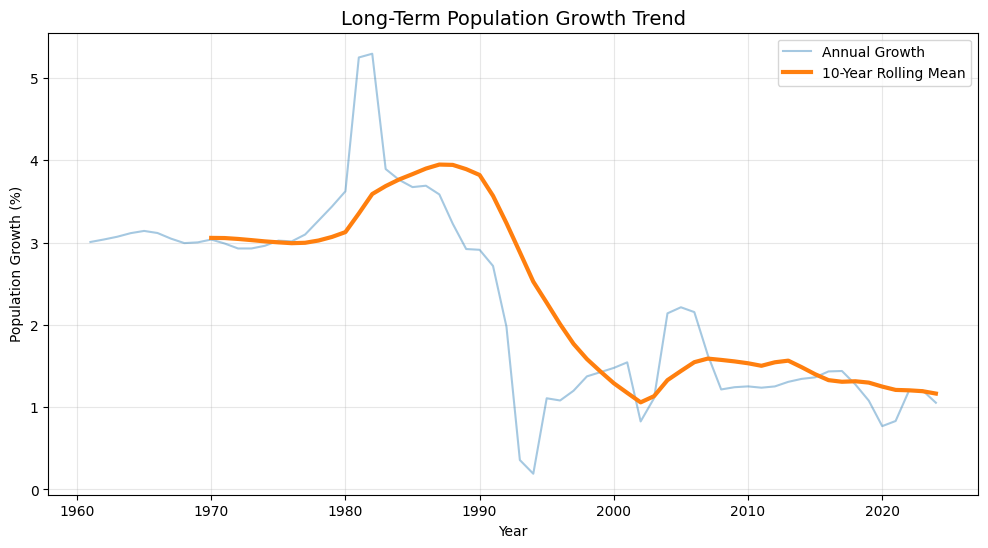

In [38]:
df["Population_Growth_Rolling_10Y"] = df["Population_Growth_Percent"].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Population_Growth_Percent"], alpha=0.4, label="Annual Growth")
plt.plot(df["Year"], df["Population_Growth_Rolling_10Y"], linewidth=3, label="10-Year Rolling Mean")

plt.title("Long-Term Population Growth Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **⚖️ 4. Economic Growth vs Population Growth (Mismatch Detection)**
**🔍 Insight**

- Reveals sustainability issues
- GDP growth < population growth → declining living standards

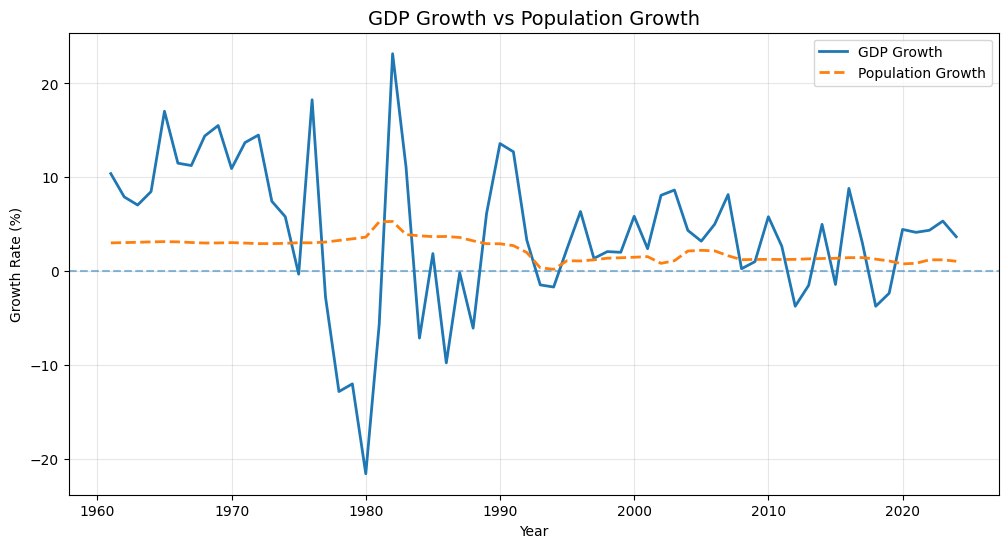

In [39]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")
plt.plot(df["Year"], df["Population_Growth_Percent"], linewidth=2, linestyle="--", label="Population Growth")

plt.axhline(0, linestyle="--", alpha=0.5)

plt.title("GDP Growth vs Population Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📉 5. GDP per Capita vs Population Growth (Pressure Effect)**
**🔍 Insight**

- Direct evidence of demographic dilution
- High population growth suppresses per-capita gains

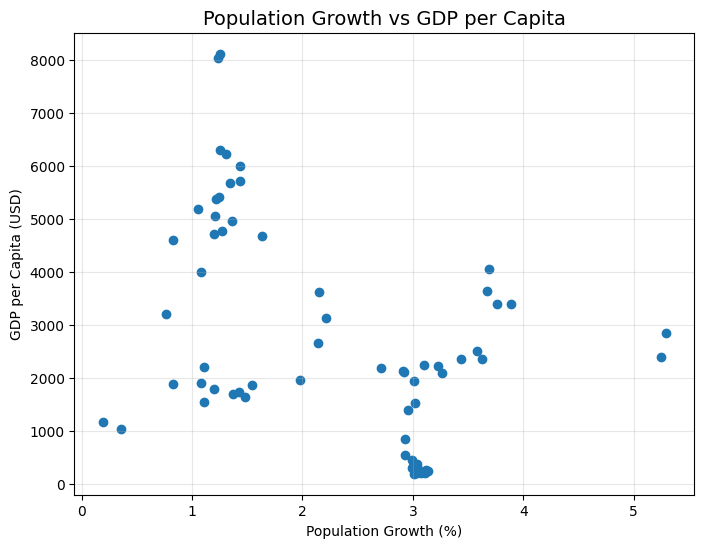

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Population_Growth_Percent"], df["GDP_Per_Capita_USD"])
plt.title("Population Growth vs GDP per Capita", fontsize=14)
plt.xlabel("Population Growth (%)")
plt.ylabel("GDP per Capita (USD)")
plt.grid(alpha=0.3)
plt.show()

### **📊 6. Sustainability Indicator: GDP Growth − Population Growth**
**🔍 Insight**

- Simple, powerful sustainability metric
- Positive = improving living standards
- Negative = demographic pressure

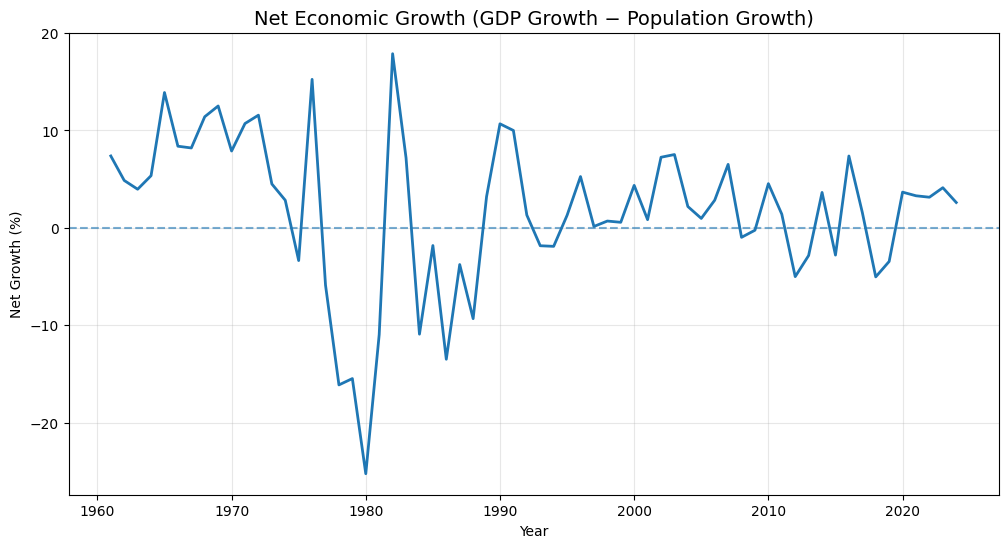

In [41]:
df["Net_Economic_Growth"] = df["GDP_Growth_Percent"] - df["Population_Growth_Percent"]

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Net_Economic_Growth"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)

plt.title("Net Economic Growth (GDP Growth − Population Growth)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Net Growth (%)")
plt.grid(alpha=0.3)
plt.show()

### **🧠 7. Decade-Wise Population Pressure Comparison**
**🔍 Insight**

- Identifies decades with unsustainable growth
- Supports long-term policy discussion

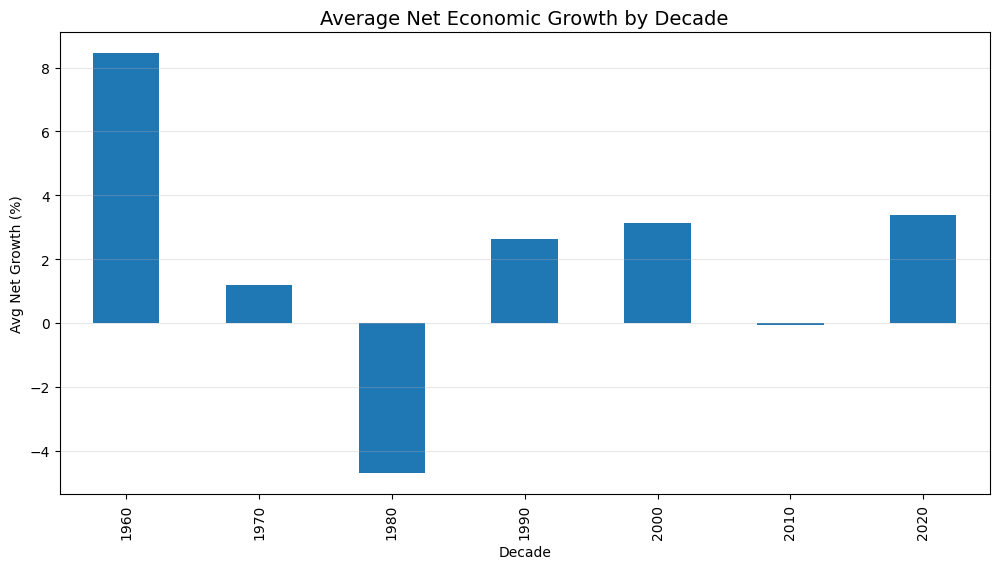

In [42]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.groupby("Decade")["Net_Economic_Growth"].mean().plot(kind="bar")
plt.title("Average Net Economic Growth by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Avg Net Growth (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()


# **📦 6. Trade Behavior & Global Integration**

### **📈 1. Exports vs Imports Over Time (Trade Expansion Story)**
**🔍 Insight**

- Trade scale growth or stagnation
- Export–import balance dynamics
- Trade contractions during crises

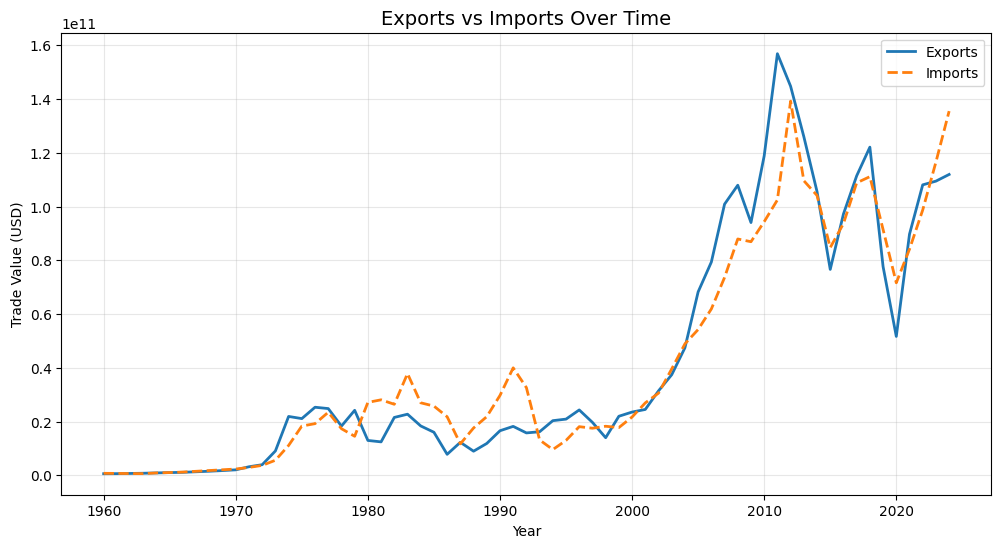

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Exports_USD"], linewidth=2, label="Exports")
plt.plot(df["Year"], df["Imports_USD"], linewidth=2, linestyle="--", label="Imports")

plt.title("Exports vs Imports Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Value (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **🔁 2. Trade Openness Over Time (Global Integration Indicator)**
**🔍 Insight**

- Measures globalization level
- Higher % → more globally integrated

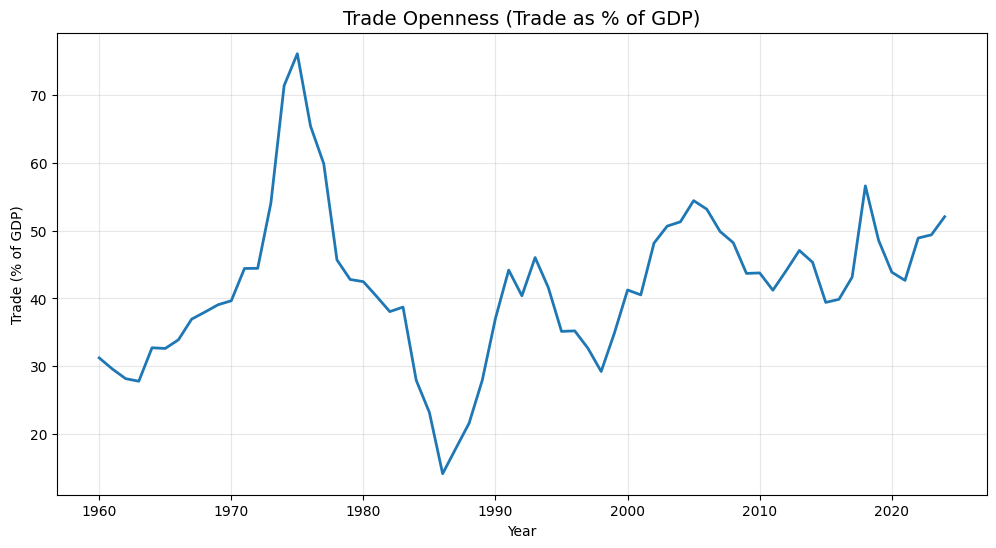

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Percent_GDP"], linewidth=2)

plt.title("Trade Openness (Trade as % of GDP)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade (% of GDP)")
plt.grid(alpha=0.3)
plt.show()

### **📉 3. Trade Expansion vs Contraction Phases**
**🔍 Insight**

- Highlights boom & bust cycles in trade
- Strong storytelling plot

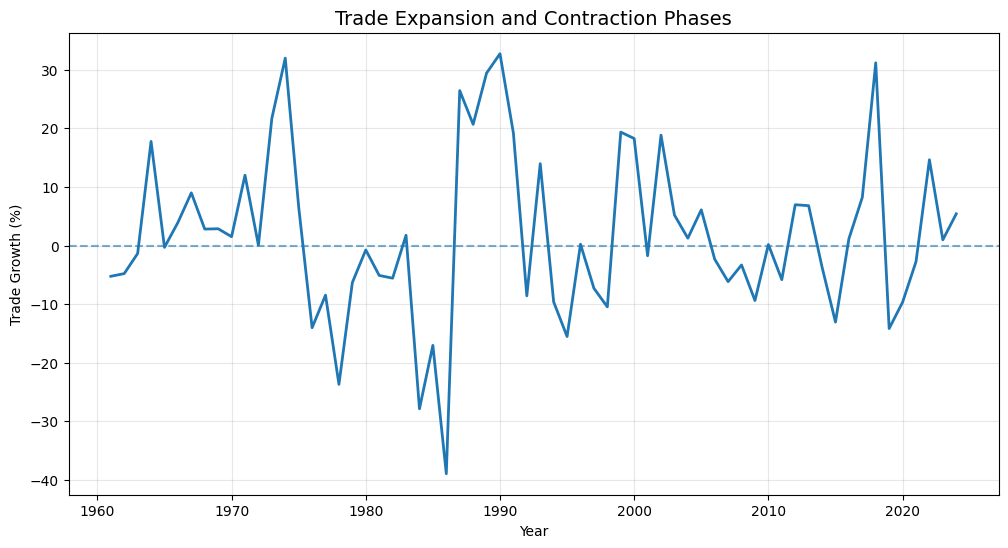

In [45]:
df["Trade_Growth"] = df["Trade_Percent_GDP"].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Growth"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)

plt.title("Trade Expansion and Contraction Phases", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Growth (%)")
plt.grid(alpha=0.3)
plt.show()

### **⚖️ 4. Trade Dependency vs Economic Growth**
**🔍 Insight**

- Tests whether trade supports growth
- Shows vulnerability to external shocks

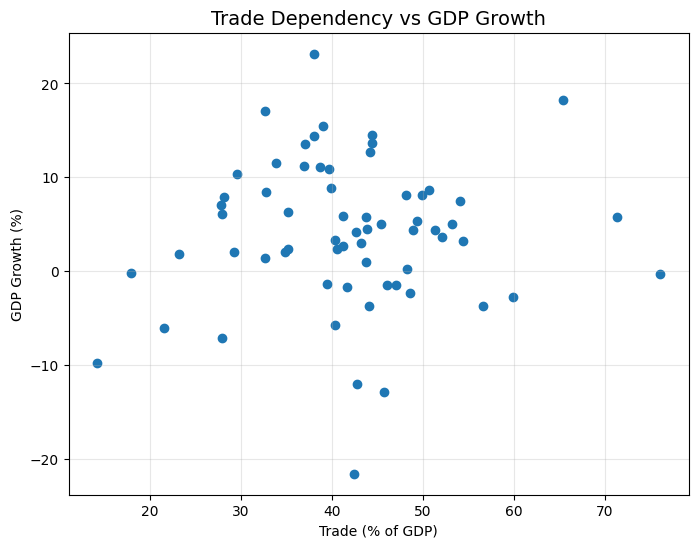

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Trade_Percent_GDP"], df["GDP_Growth_Percent"])
plt.title("Trade Dependency vs GDP Growth", fontsize=14)
plt.xlabel("Trade (% of GDP)")
plt.ylabel("GDP Growth (%)")
plt.grid(alpha=0.3)
plt.show()

### **🚨 5. Trade Response During Economic Crises**
**🔍 Insight**

- Trade collapses amplify recessions
- Strong macroeconomic stress signal

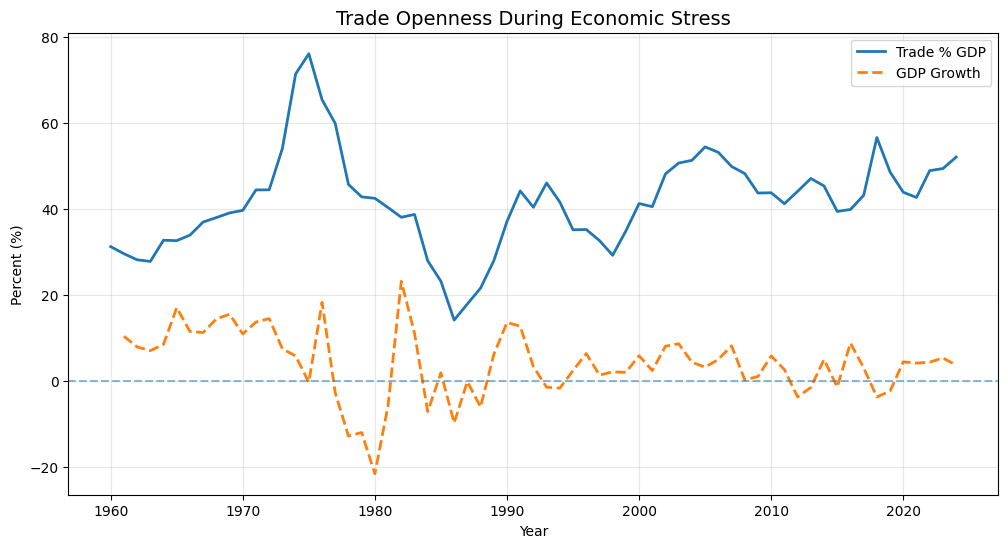

In [47]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["Trade_Percent_GDP"], linewidth=2, label="Trade % GDP")
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, linestyle="--", label="GDP Growth")

plt.axhline(0, linestyle="--", alpha=0.5)

plt.title("Trade Openness During Economic Stress", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📦 6. Export–Import Balance (Hidden but Powerful Insight)**
**🔍 Insight**

- Reveals trade surplus vs deficit
- Indicates external sustainability

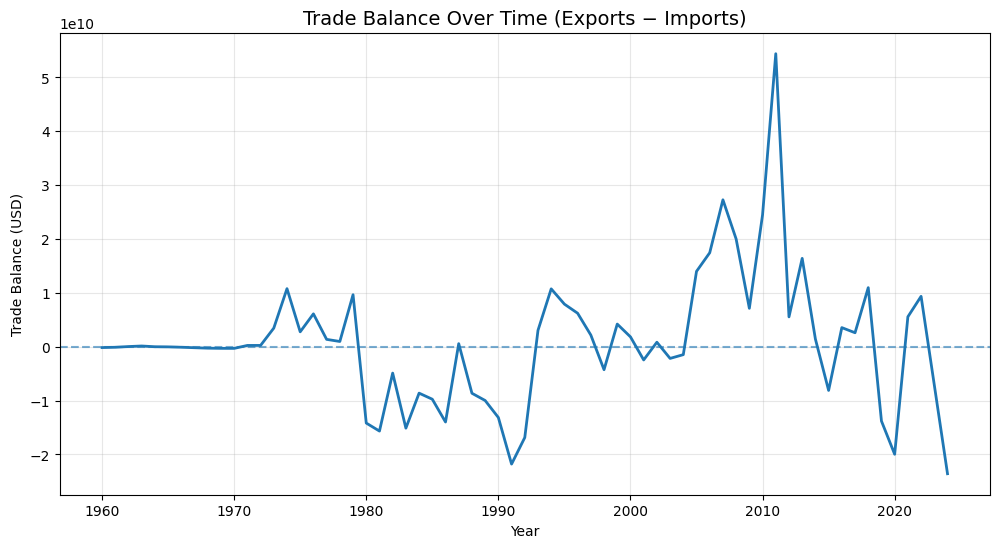

In [48]:
df["Trade_Balance"] = df["Exports_USD"] - df["Imports_USD"]

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Balance"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6)

plt.title("Trade Balance Over Time (Exports − Imports)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD)")
plt.grid(alpha=0.3)
plt.show()

### **📊 7. Decade-Wise Trade Openness Comparison**
**🔍 Insight**

- Identifies most globally integrated decades
- Removes yearly noise

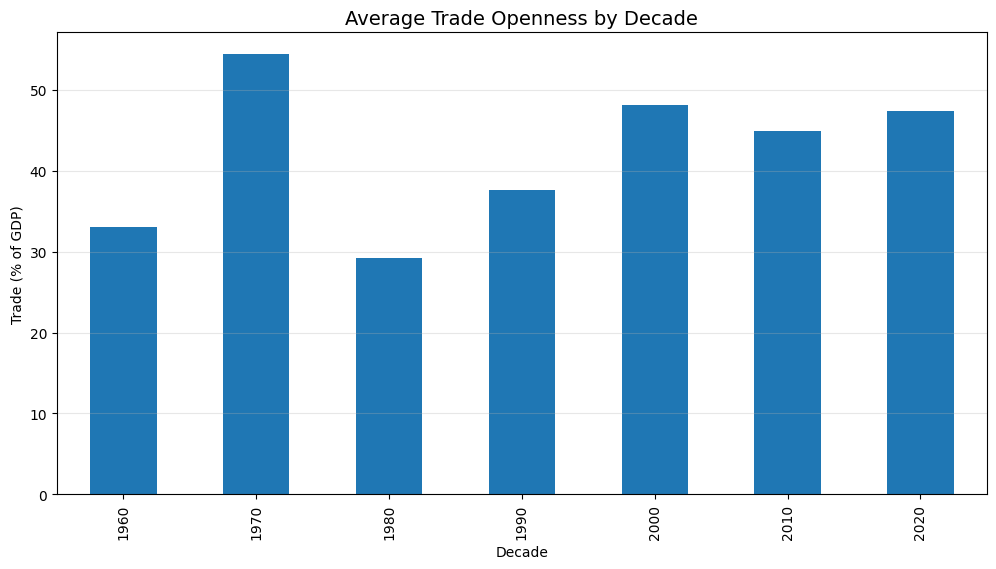

In [49]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.groupby("Decade")["Trade_Percent_GDP"].mean().plot(kind="bar")
plt.title("Average Trade Openness by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Trade (% of GDP)")
plt.grid(axis="y", alpha=0.3)
plt.show()

# **⚖️ 7. Trade Balance Evolution (Hidden Insight)**

### **📦 1. Trade Balance Over Time**
**🔍 Insight**

- Shows surplus vs deficit periods
- Reveals structural trade imbalances

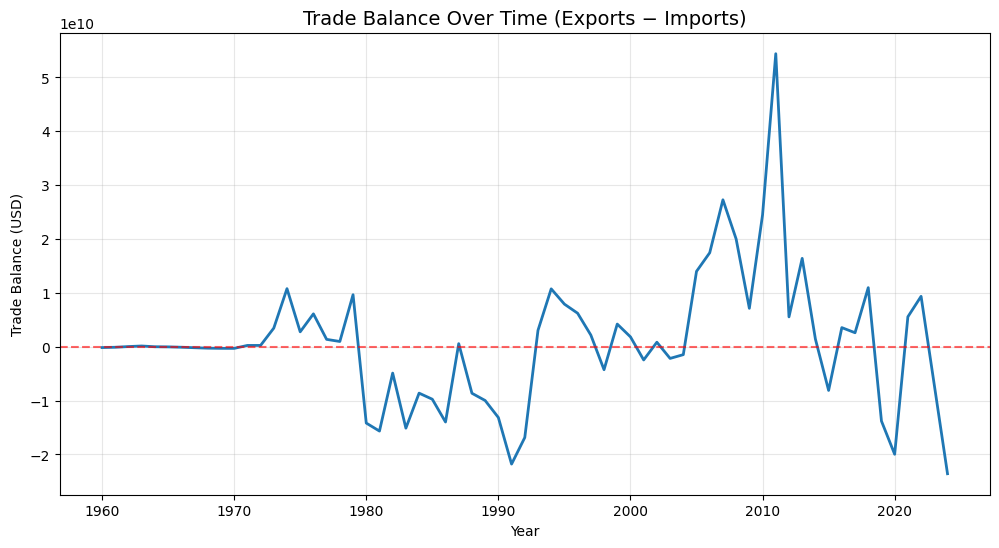

In [50]:
# Already derived:
df["Trade_Balance"] = df["Exports_USD"] - df["Imports_USD"]

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Balance"], linewidth=2)
plt.axhline(0, linestyle="--", alpha=0.6, color="red")

plt.title("Trade Balance Over Time (Exports − Imports)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD)")
plt.grid(alpha=0.3)
plt.show()

### **📉 2. Highlight Surplus & Deficit Years**
**🔍 Insight**

- Makes key periods visually obvious
- Great storytelling element

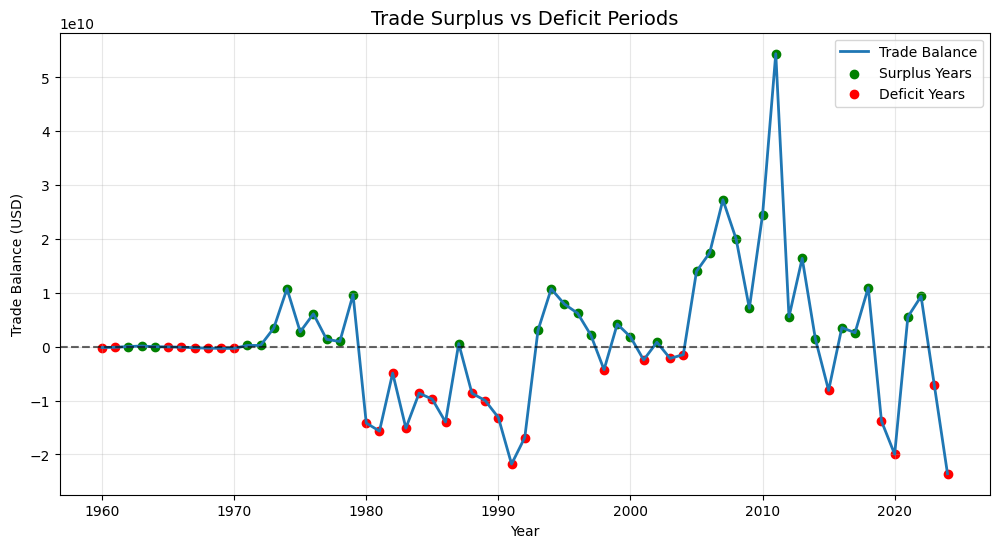

In [51]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["Trade_Balance"], linewidth=2, label="Trade Balance")
plt.scatter(
    df[df["Trade_Balance"] > 0]["Year"],
    df[df["Trade_Balance"] > 0]["Trade_Balance"],
    color="green", label="Surplus Years"
)
plt.scatter(
    df[df["Trade_Balance"] < 0]["Year"],
    df[df["Trade_Balance"] < 0]["Trade_Balance"],
    color="red", label="Deficit Years"
)
plt.axhline(0, linestyle="--", alpha=0.6, color="black")
plt.title("Trade Surplus vs Deficit Periods", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📊 3. Trade Balance vs GDP Growth**
**🔍 Insight**

- Shows if surpluses/deficits correlate with economic growth
- Reveals resilience or vulnerability

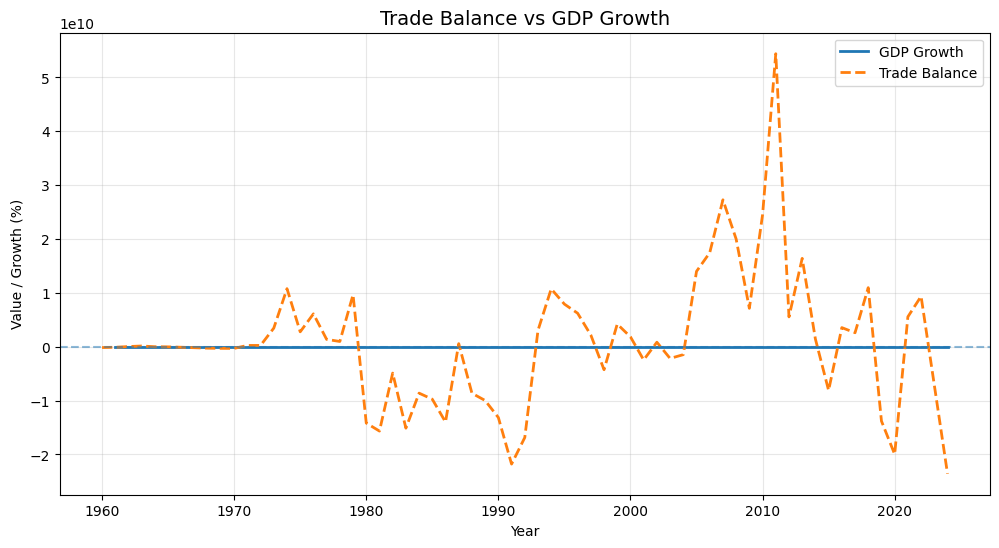

In [52]:
plt.figure(figsize=(12, 6))

plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")
plt.plot(df["Year"], df["Trade_Balance"], linewidth=2, linestyle="--", label="Trade Balance")

plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Trade Balance vs GDP Growth", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value / Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **🔁 4. Trade Balance Volatility (Rolling Metric)**
**🔍 Insight**

- Reveals structural instability in trade
- Smoothes yearly fluctuations

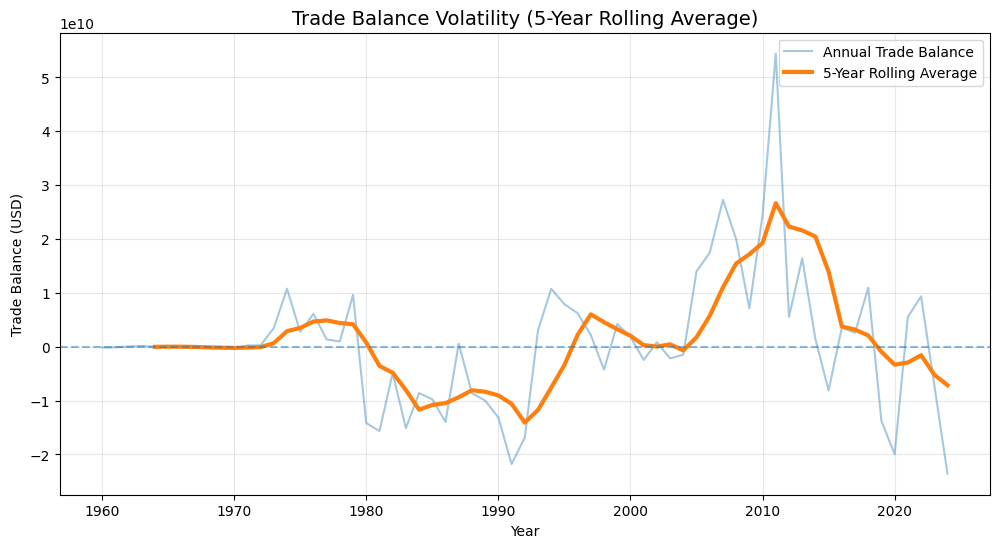

In [53]:
df["Trade_Balance_Rolling_5Y"] = df["Trade_Balance"].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Balance"], alpha=0.4, label="Annual Trade Balance")
plt.plot(df["Year"], df["Trade_Balance_Rolling_5Y"], linewidth=3, label="5-Year Rolling Average")

plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Trade Balance Volatility (5-Year Rolling Average)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📦 5. Decade-Wise Average Trade Balance**
**🔍 Insight**

- Identifies persistent trends
- Shows which decades were structurally stronger

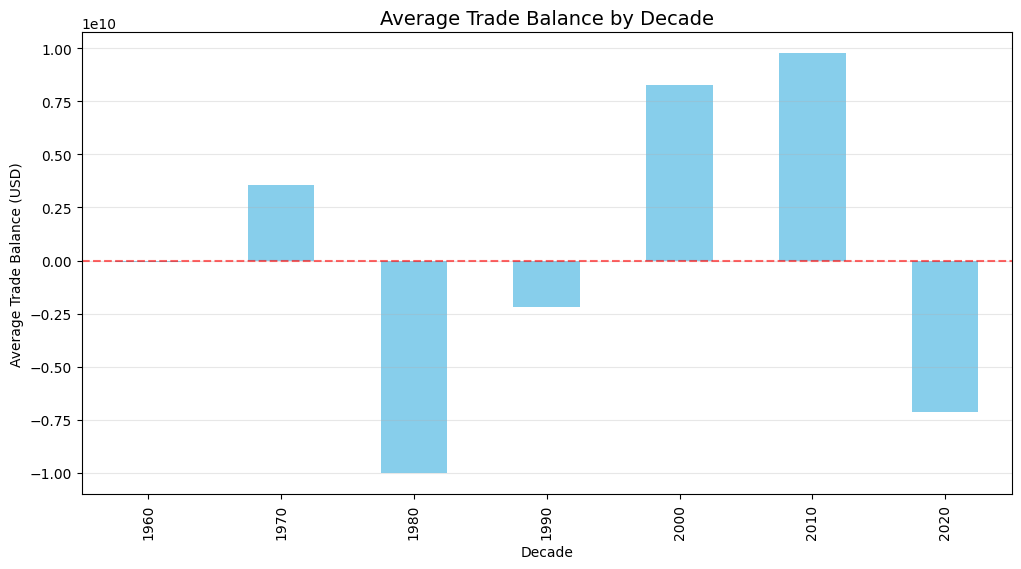

In [54]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.groupby("Decade")["Trade_Balance"].mean().plot(kind="bar", color="skyblue")
plt.axhline(0, linestyle="--", alpha=0.6, color="red")
plt.title("Average Trade Balance by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average Trade Balance (USD)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **🧠 6. Trade Balance Distribution (Optional Advanced Insight)**
**🔍 Insight**

- Highlights extreme surpluses or deficits
- Shows skewness in trade performance

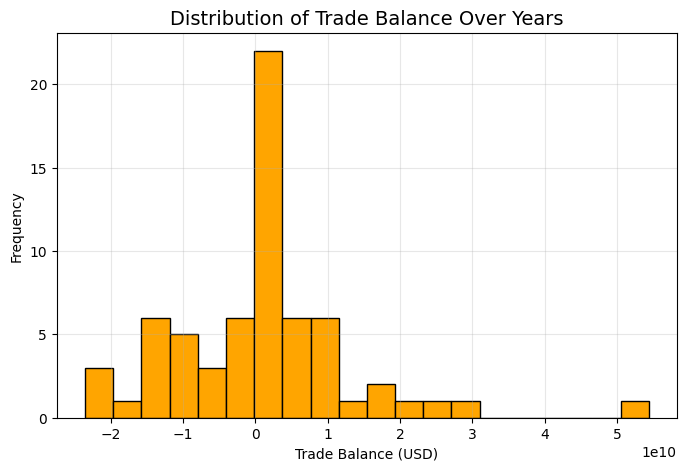

In [55]:
plt.figure(figsize=(8, 5))
plt.hist(df["Trade_Balance"], bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Trade Balance Over Years", fontsize=14)
plt.xlabel("Trade Balance (USD)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# **🏭 8. Industrial Contribution to GDP**

### **📈 1. Industry Share of GDP Over Time**
**🔍 Insight**

- Shows industrialization trend
- Detects sectoral shifts
- Simple but highly visual

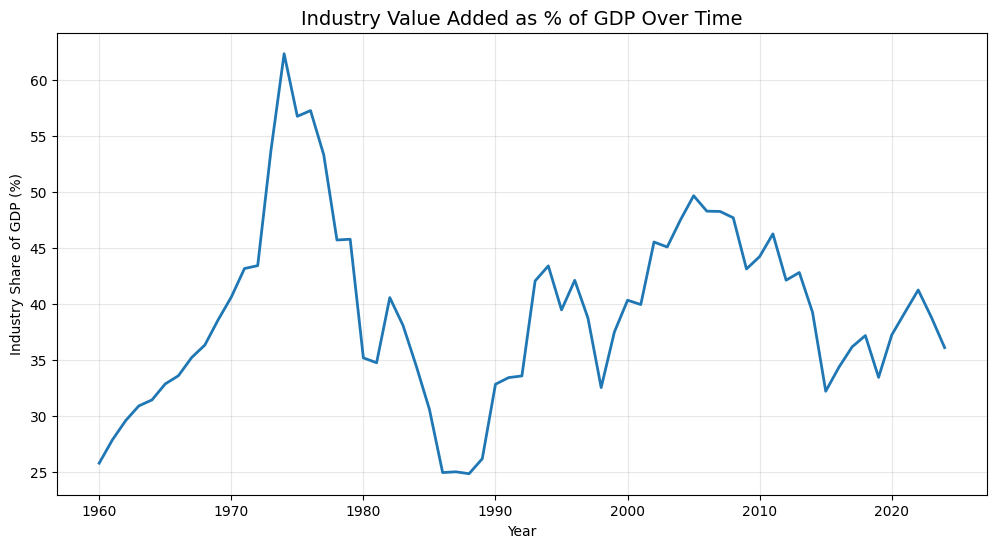

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Industry_Value_Added_Percent_GDP"], linewidth=2)

plt.title("Industry Value Added as % of GDP Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Industry Share of GDP (%)")
plt.grid(alpha=0.3)
plt.show()

### **📉 2. Rolling Average Trend (Structural Analysis)**
**🔍 Insight**

- Smooths yearly noise
- Shows long-term industrialization trajectory

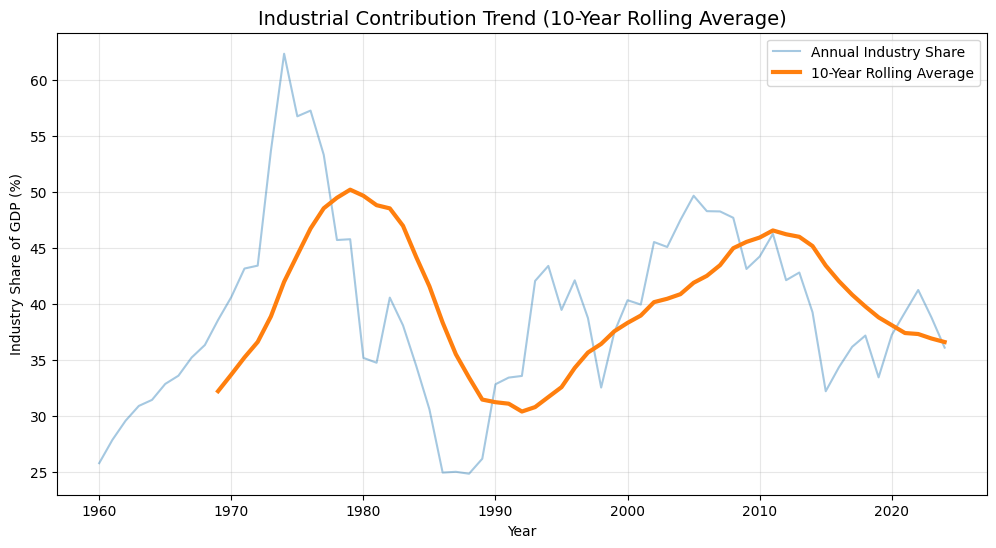

In [57]:
df["Industry_Rolling_10Y"] = df["Industry_Value_Added_Percent_GDP"].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Industry_Value_Added_Percent_GDP"], alpha=0.4, label="Annual Industry Share")
plt.plot(df["Year"], df["Industry_Rolling_10Y"], linewidth=3, label="10-Year Rolling Average")

plt.title("Industrial Contribution Trend (10-Year Rolling Average)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Industry Share of GDP (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **⚖️ 3. Industry Share vs GDP Growth**
**🔍 Insight**

- Explores relationship between industrialization and growth
- Shows if higher industry share correlates with GDP performance

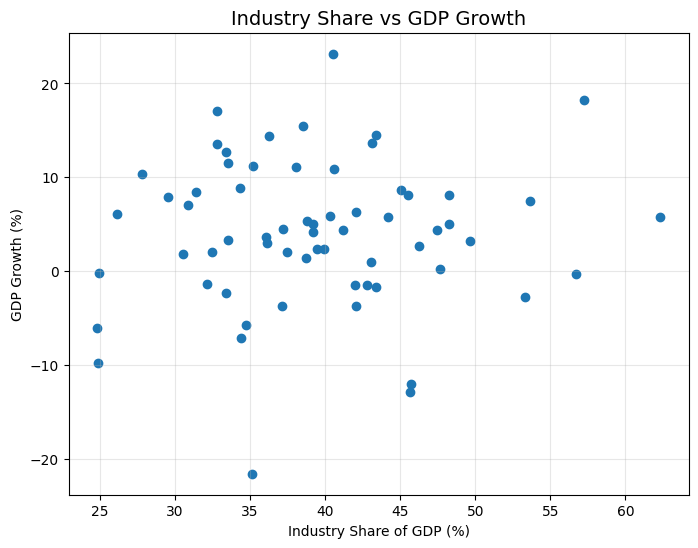

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Industry_Value_Added_Percent_GDP"], df["GDP_Growth_Percent"])
plt.title("Industry Share vs GDP Growth", fontsize=14)
plt.xlabel("Industry Share of GDP (%)")
plt.ylabel("GDP Growth (%)")
plt.grid(alpha=0.3)
plt.show()

### **📊 4. Industrial Share Volatility Across Decades**
**🔍 Insight**

- Shows periods of structural stability or shifts
- Highlights sectors transitioning

<Figure size 1200x600 with 0 Axes>

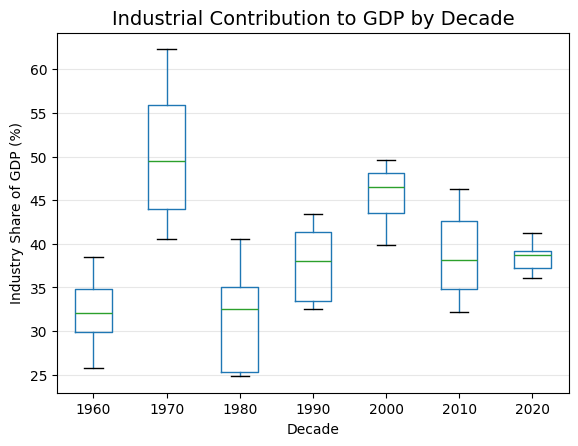

In [59]:
df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
df.boxplot(
    column="Industry_Value_Added_Percent_GDP",
    by="Decade",
    grid=False
)

plt.title("Industrial Contribution to GDP by Decade", fontsize=14)
plt.suptitle("")
plt.xlabel("Decade")
plt.ylabel("Industry Share of GDP (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **🔁 5. Industrial Growth vs Economic Shocks**
**🔍 Insight**

- Detects whether industrial sector is resilient or volatile
- Helps identify structural shocks

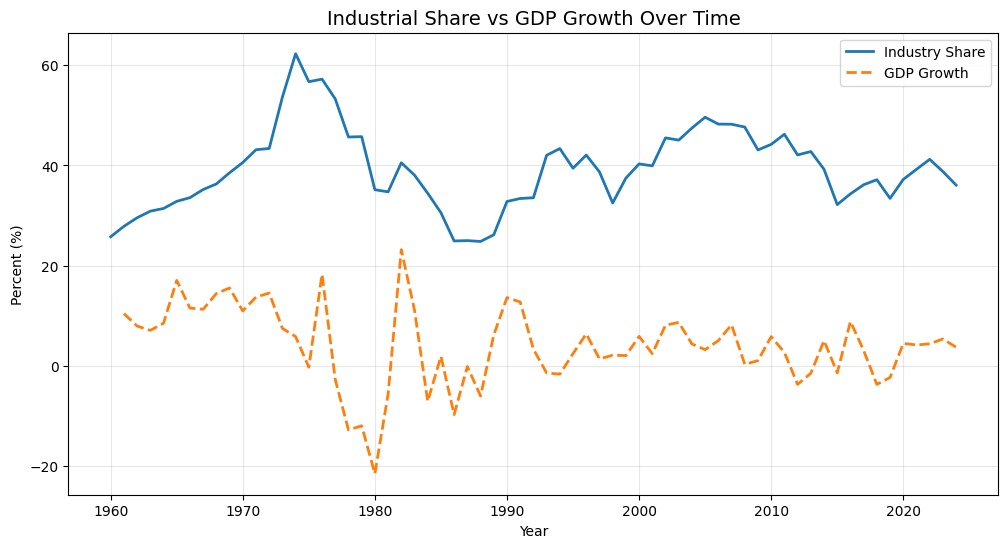

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Industry_Value_Added_Percent_GDP"], linewidth=2, label="Industry Share")
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, linestyle="--", label="GDP Growth")

plt.title("Industrial Share vs GDP Growth Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percent (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📊 6. Decade-Wise Average Industry Share**
**🔍 Insight**

- Highlights which decades were more industrialized 
- Great for summary storytelling

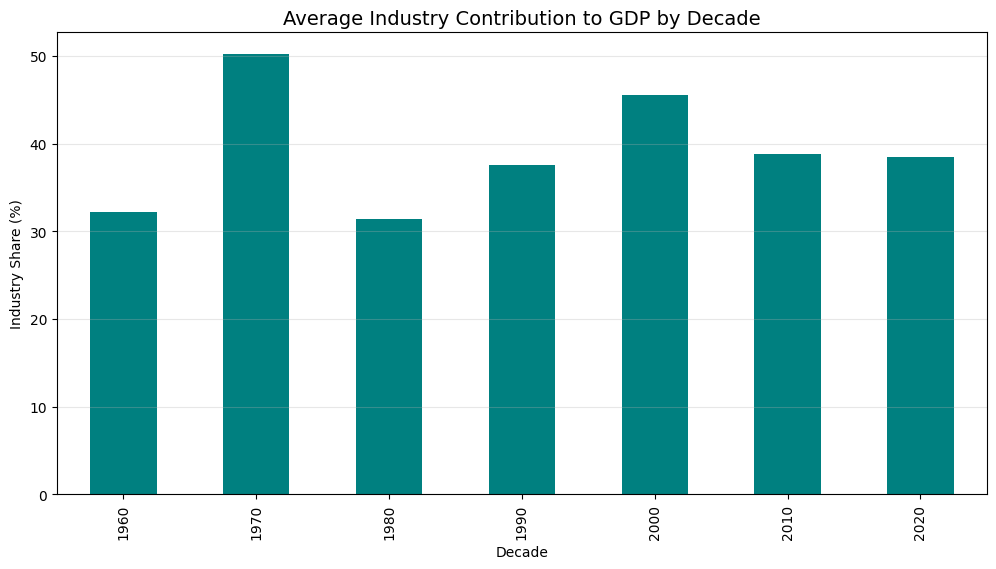

In [61]:
plt.figure(figsize=(12, 6))
df.groupby("Decade")["Industry_Value_Added_Percent_GDP"].mean().plot(kind="bar", color="teal")
plt.title("Average Industry Contribution to GDP by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Industry Share (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

# **🔗 9. Correlation & Dependency Analysis**

### **📊 1. Correlation Heatmap (All Numeric Columns)**
**🔍 Insight**

- Strongest drivers of GDP growth
- Detect multicollinearity for modeling
- Classic, must-have plot

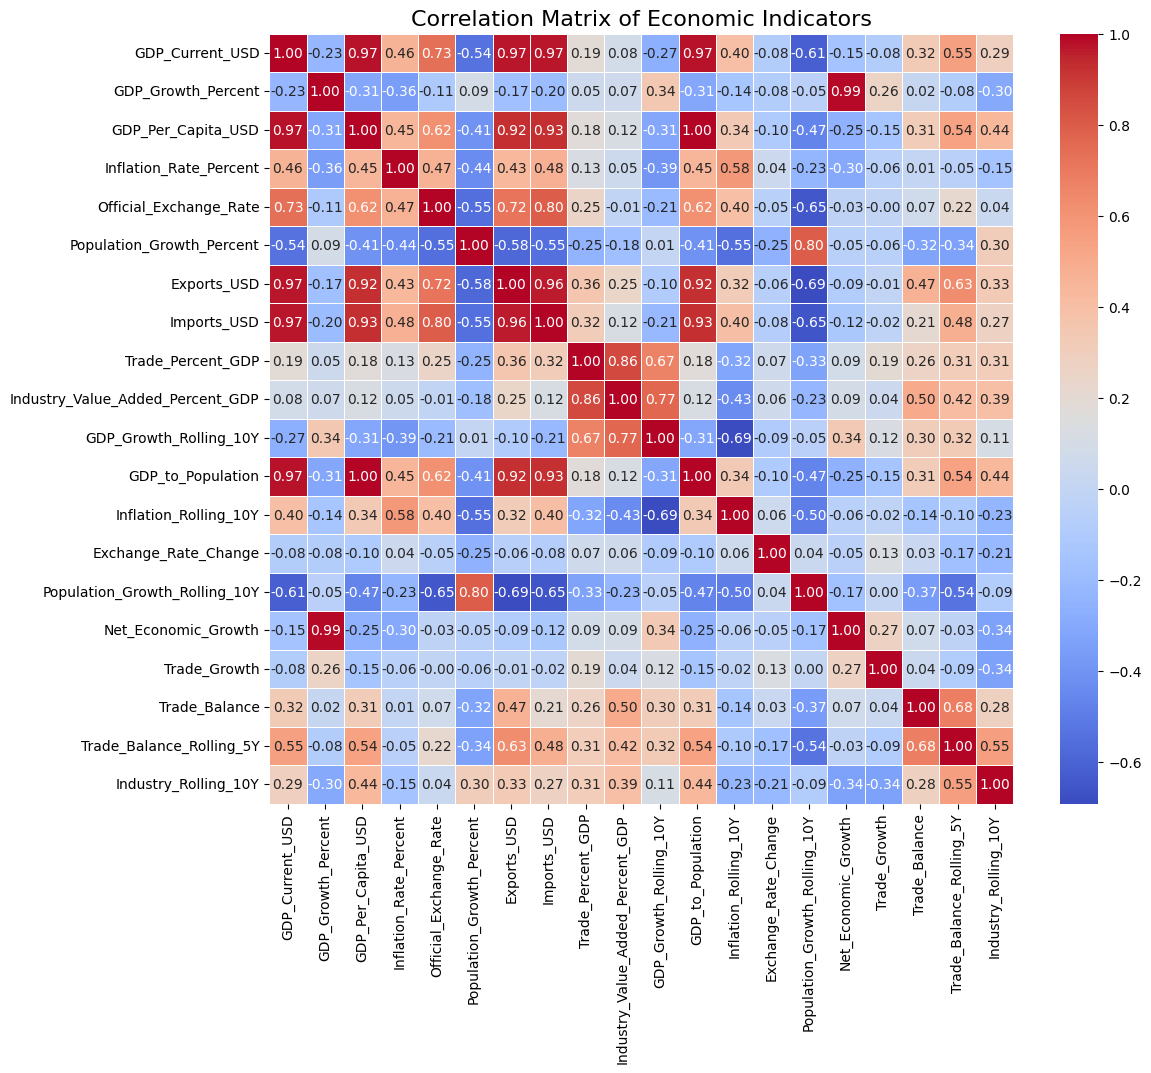

In [62]:
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include="float64").columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Economic Indicators", fontsize=16)
plt.show()

### **📉 2. GDP Growth vs Strongest Drivers**
**🔍 Insight**

- Scatter plots with regression line
- Shows visually the drivers of GDP growth

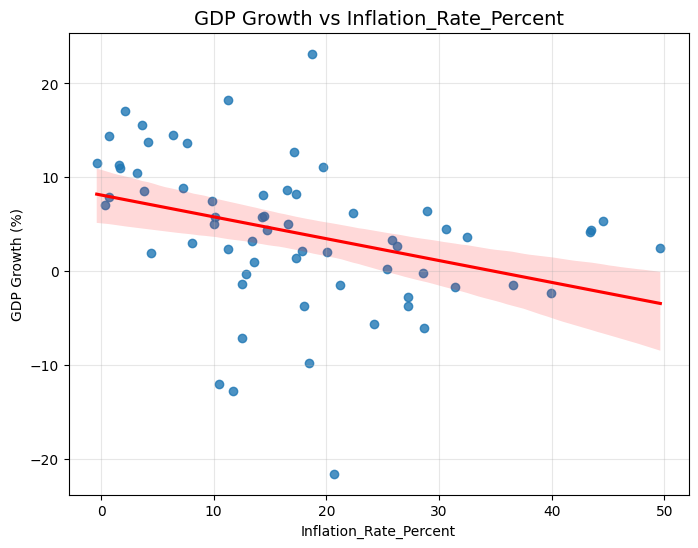

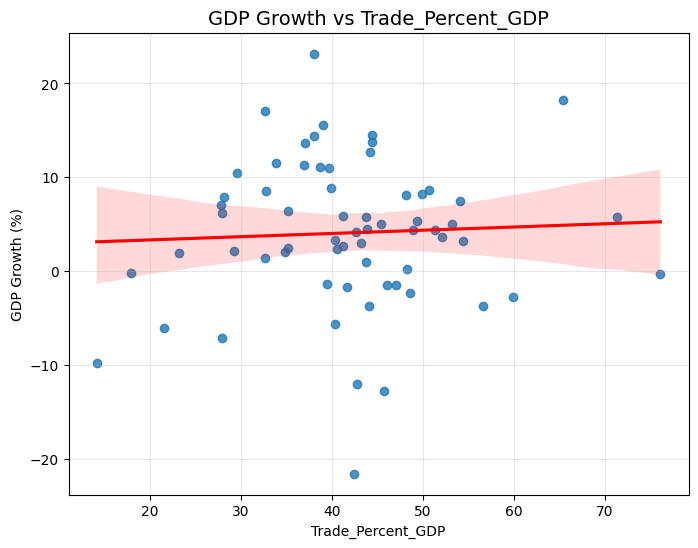

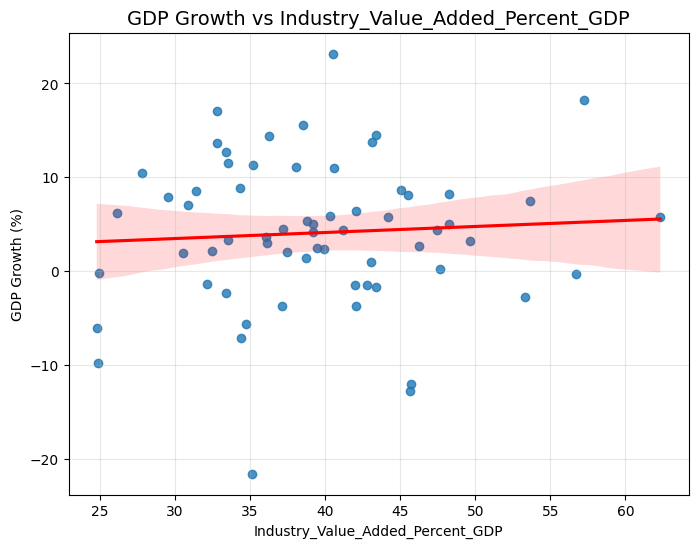

In [63]:
top_drivers = ["Inflation_Rate_Percent", "Trade_Percent_GDP", "Industry_Value_Added_Percent_GDP"]

for col in top_drivers:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[col], y=df["GDP_Growth_Percent"], line_kws={"color":"red"})
    plt.title(f"GDP Growth vs {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("GDP Growth (%)")
    plt.grid(alpha=0.3)
    plt.show()

### **⚖️ 3. Inflation vs Exchange Rate Correlation**
**🔍 Insight**

- Macro link: inflation pass-through from currency depreciation

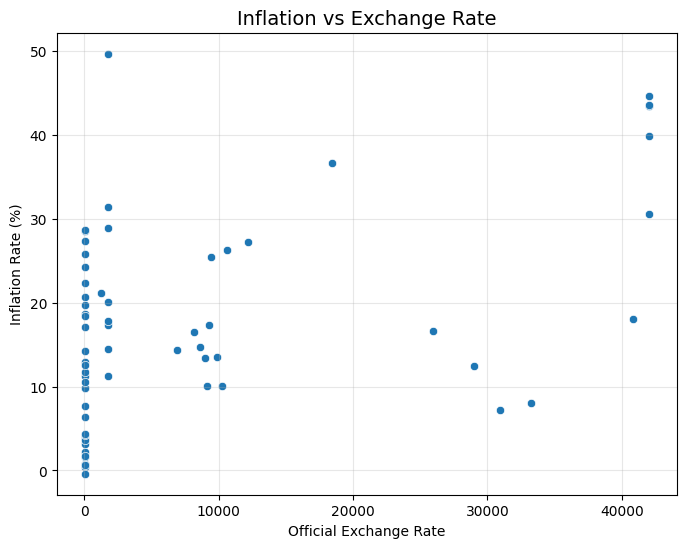

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Official_Exchange_Rate"], y=df["Inflation_Rate_Percent"])
plt.title("Inflation vs Exchange Rate", fontsize=14)
plt.xlabel("Official Exchange Rate")
plt.ylabel("Inflation Rate (%)")
plt.grid(alpha=0.3)
plt.show()

### **📊 4. Trade Openness vs GDP per Capita**
**🔍 Insight**

- Shows if more global integration improves living standards

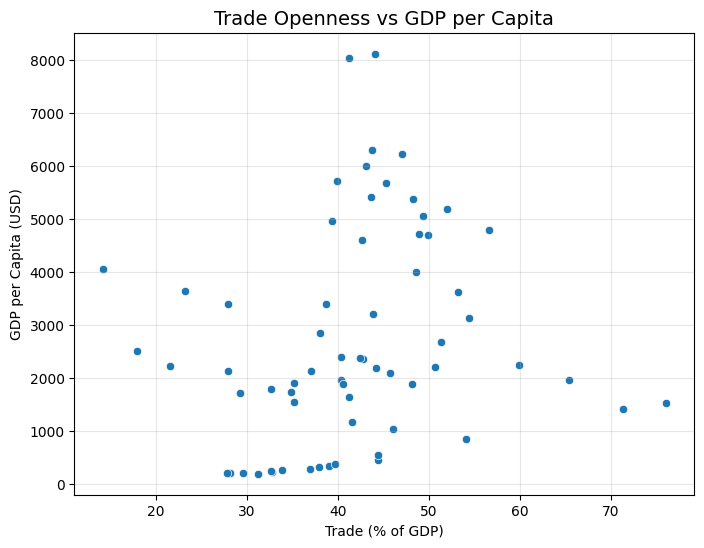

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Trade_Percent_GDP"], y=df["GDP_Per_Capita_USD"])
plt.title("Trade Openness vs GDP per Capita", fontsize=14)
plt.xlabel("Trade (% of GDP)")
plt.ylabel("GDP per Capita (USD)")
plt.grid(alpha=0.3)
plt.show()

### **🔁 5. Pairplot for Key Indicators**
**🔍 Insight**

- Visualize pairwise relationships
- Detect nonlinear dependencies

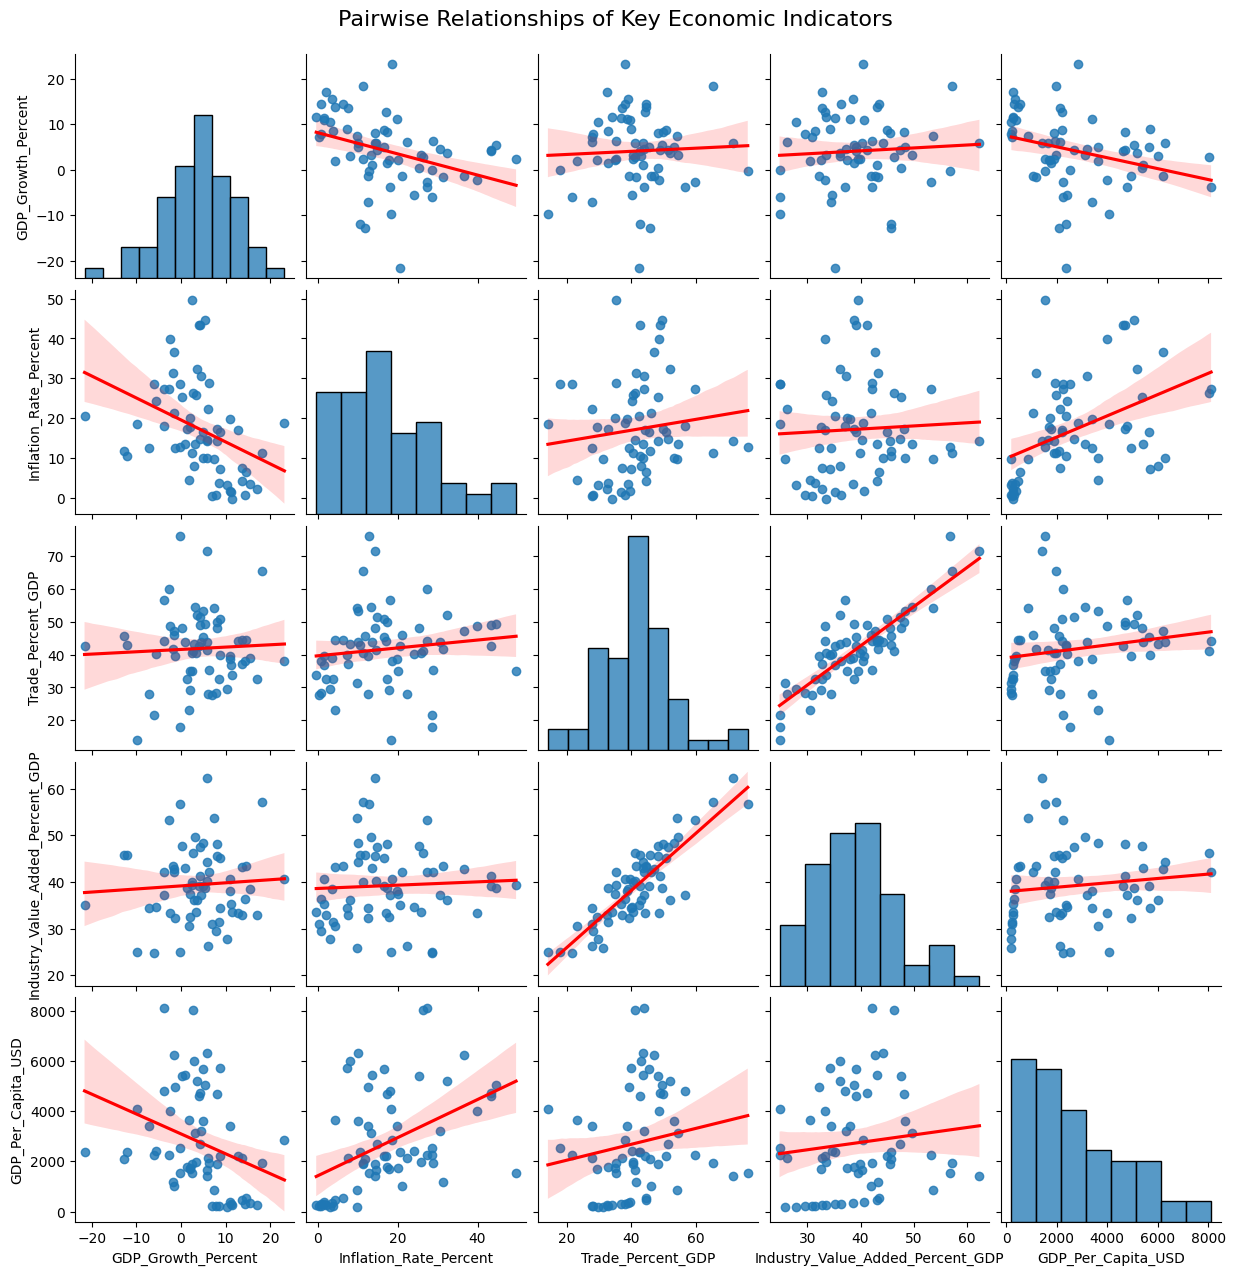

In [66]:
key_cols = ["GDP_Growth_Percent", "Inflation_Rate_Percent", "Trade_Percent_GDP", 
            "Industry_Value_Added_Percent_GDP", "GDP_Per_Capita_USD"]

sns.pairplot(df[key_cols], kind="reg", plot_kws={"line_kws":{"color":"red"}})
plt.suptitle("Pairwise Relationships of Key Economic Indicators", y=1.02, fontsize=16)
plt.show()

### **🏁 6. Multicollinearity Check (Variance Inflation Factor)**
**🔍 Insight**

- Prepares for regression/modeling
- Detects highly correlated features

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Drop the target column for VIF calculation
X = df[numeric_cols].drop(columns=["GDP_Growth_Percent"])

# Drop rows with NaNs
X_clean = X.dropna()

vif_data = pd.DataFrame()
vif_data["Feature"] = X_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)

Feature         VIF
2                 GDP_Per_Capita_USD         inf
7                        Exports_USD         inf
19                     Trade_Balance         inf
13                 GDP_to_Population         inf
8                        Imports_USD         inf
1                    GDP_Current_USD  894.885503
5                   Population_Total   72.296364
12                            Decade   44.810259
0                               Year   44.303948
16     Population_Growth_Rolling_10Y   29.255993
21              Industry_Rolling_10Y   27.135180
10  Industry_Value_Added_Percent_GDP   22.684935
11            GDP_Growth_Rolling_10Y   21.746625
9                  Trade_Percent_GDP   17.042180
4             Official_Exchange_Rate   16.544849
14             Inflation_Rolling_10Y   14.298039
6          Population_Growth_Percent   13.216802
20          Trade_Balance_Rolling_5Y   12.993925
3             Inflation_Rate_Percent    3.267916
17               Net_Economic_Growth    2.344542
18                      Trade_Growth    2.197463
15              Exchange_Rate_Change    1.952622

# **📊 10. Volatility & Stability Analysis (Advanced EDA)**

### **📈 1. Rolling Standard Deviation Over Time (Volatility Trend)**
**🔍 Insight**

- Measures short-term fluctuations
- Reveals periods of high economic uncertainty

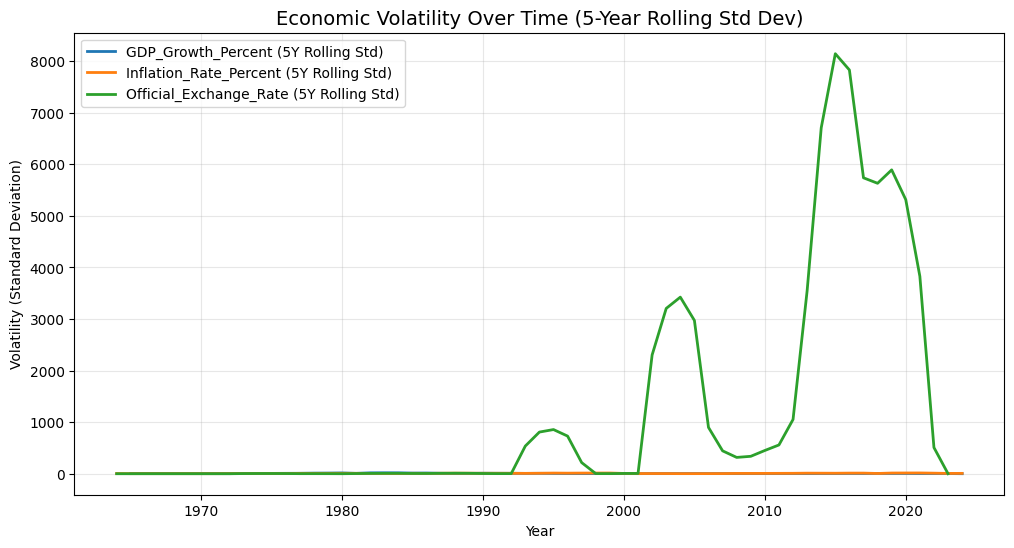

In [68]:
# Choose key indicators
vol_cols = ["GDP_Growth_Percent", "Inflation_Rate_Percent", "Official_Exchange_Rate"]

# Compute rolling 5-year standard deviation
rolling_window = 5
rolling_vol = df[vol_cols].rolling(rolling_window).std()

plt.figure(figsize=(12, 6))
for col in vol_cols:
    plt.plot(df["Year"], rolling_vol[col], linewidth=2, label=f"{col} (5Y Rolling Std)")

plt.title("Economic Volatility Over Time (5-Year Rolling Std Dev)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📉 2. GDP Growth Volatility vs Inflation Volatility**
**🔍 Insight**

- Detect if unstable inflation coincides with GDP instability
- Good for crisis analysis

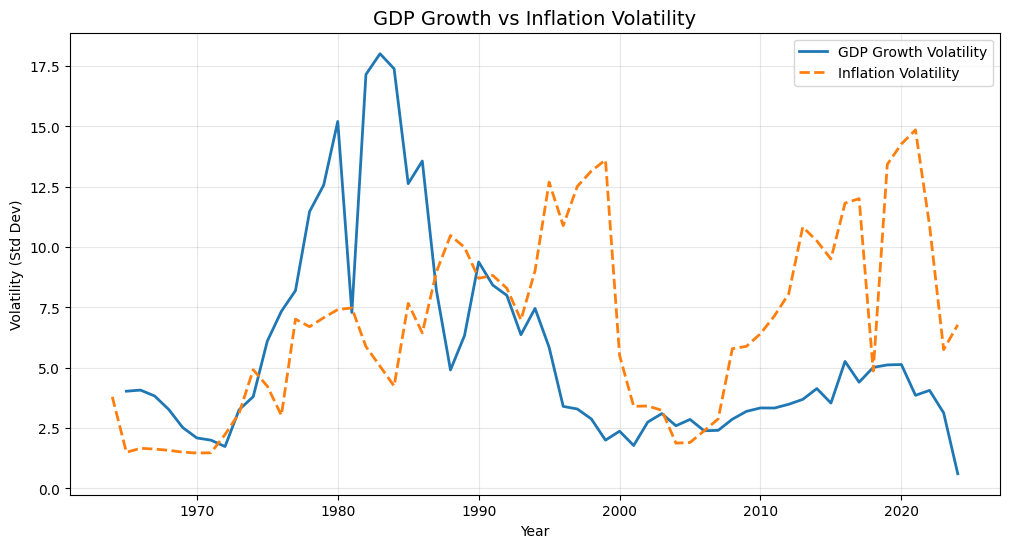

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], rolling_vol["GDP_Growth_Percent"], linewidth=2, label="GDP Growth Volatility")
plt.plot(df["Year"], rolling_vol["Inflation_Rate_Percent"], linewidth=2, linestyle="--", label="Inflation Volatility")

plt.title("GDP Growth vs Inflation Volatility", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Volatility (Std Dev)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **⚖️ 3. Exchange Rate Volatility**
**🔍 Insight**

- Currency instability → macroeconomic uncertainty
- Especially relevant for emerging markets like Iran

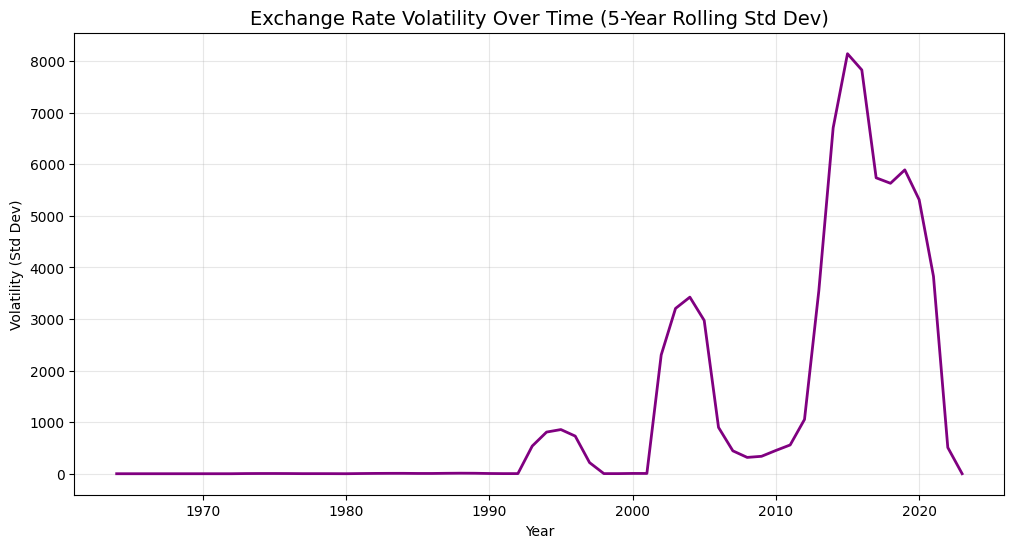

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], rolling_vol["Official_Exchange_Rate"], linewidth=2, color="purple")

plt.title("Exchange Rate Volatility Over Time (5-Year Rolling Std Dev)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Volatility (Std Dev)")
plt.grid(alpha=0.3)
plt.show()

### **🔁 4. Decade-Wise Average Volatility**
**🔍 Insight**

- Highlights which decades were more volatile
- Supports macro-level storytelling

<Figure size 1200x600 with 0 Axes>

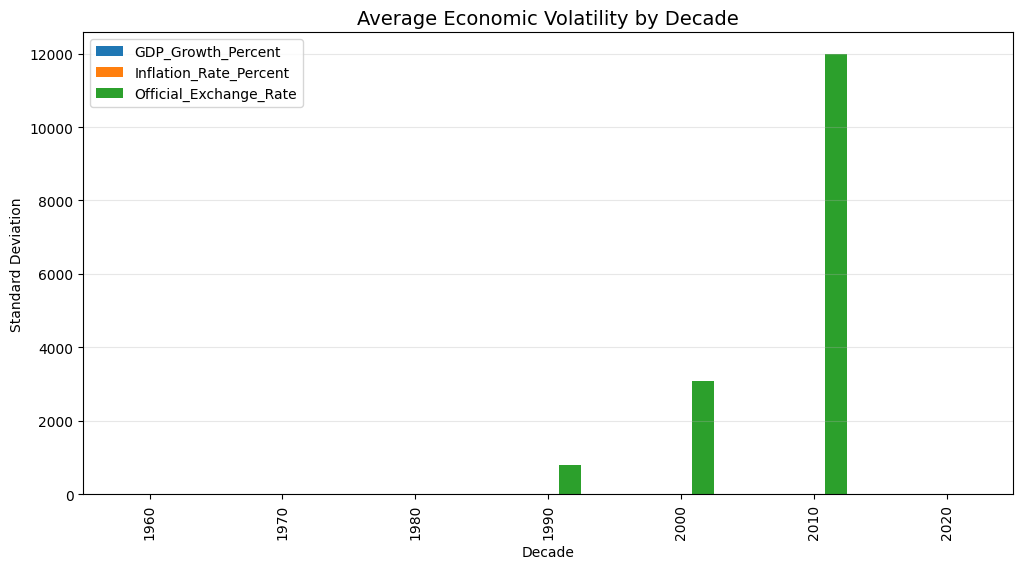

In [71]:
df["Decade"] = (df["Year"] // 10) * 10

decade_vol = df.groupby("Decade")[vol_cols].std()

plt.figure(figsize=(12, 6))
decade_vol.plot(kind="bar", figsize=(12,6))
plt.title("Average Economic Volatility by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Standard Deviation")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **📊 5. Heatmap of Volatility Across Indicators**
**🔍 Insight**

- Visual comparison of which indicators are more volatile
- Quickly shows risk concentration

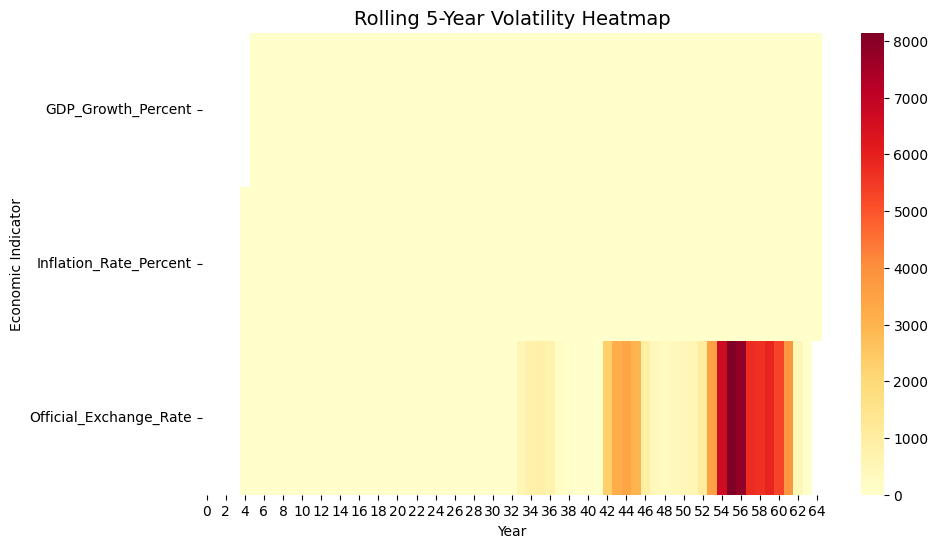

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(rolling_vol.T, cmap="YlOrRd", annot=False)
plt.title("Rolling 5-Year Volatility Heatmap", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Economic Indicator")
plt.show()

### **🏁 6. Highlight Crisis Years**
**🔍 Insight**

- Visually annotate spikes
- Adds expert-level polish

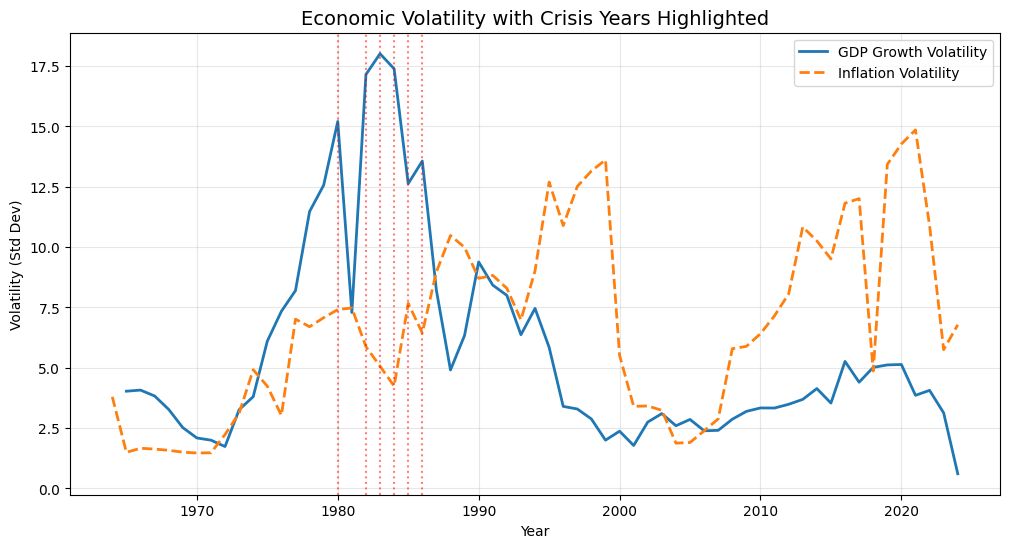

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], rolling_vol["GDP_Growth_Percent"], linewidth=2, label="GDP Growth Volatility")
plt.plot(df["Year"], rolling_vol["Inflation_Rate_Percent"], linewidth=2, linestyle="--", label="Inflation Volatility")

# Highlight high-volatility years
high_vol_years = df["Year"][rolling_vol["GDP_Growth_Percent"] > rolling_vol["GDP_Growth_Percent"].quantile(0.9)]
for y in high_vol_years:
    plt.axvline(y, color="red", linestyle=":", alpha=0.5)

plt.title("Economic Volatility with Crisis Years Highlighted", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Volatility (Std Dev)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# **🧪 11. Decade-Wise Comparative Analysis**

### **📊 1. Average GDP Growth by Decade**
**🔍 Insight**

- Best and worst decades economically
- Shows long-term growth trends

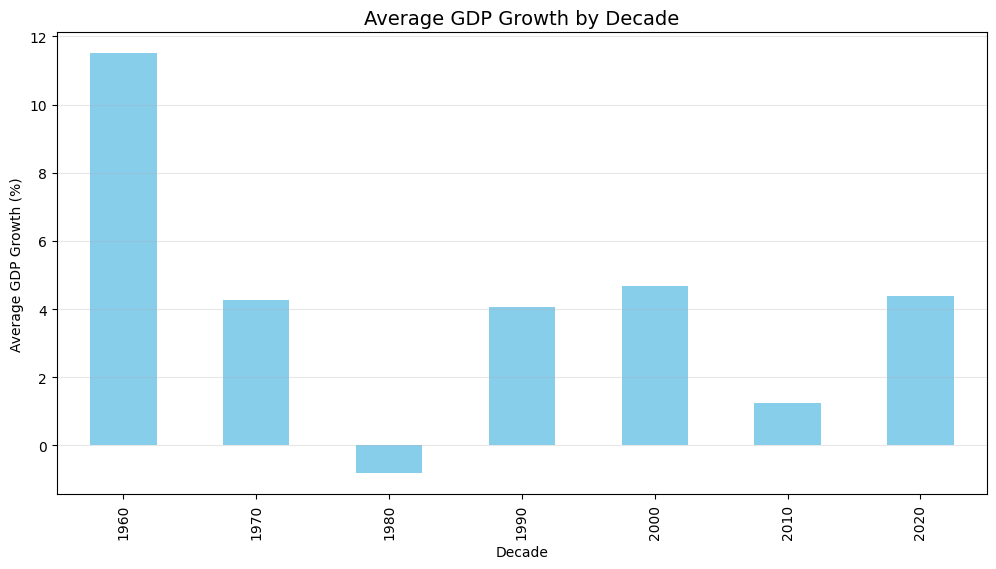

In [74]:
decade_gdp = df.groupby("Decade")["GDP_Growth_Percent"].mean()

plt.figure(figsize=(12, 6))
decade_gdp.plot(kind="bar", color="skyblue")
plt.title("Average GDP Growth by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average GDP Growth (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **📉 2. Average Inflation by Decade**
**🔍 Insight**

- Compare inflation across decades
- Detect persistent high-inflation periods

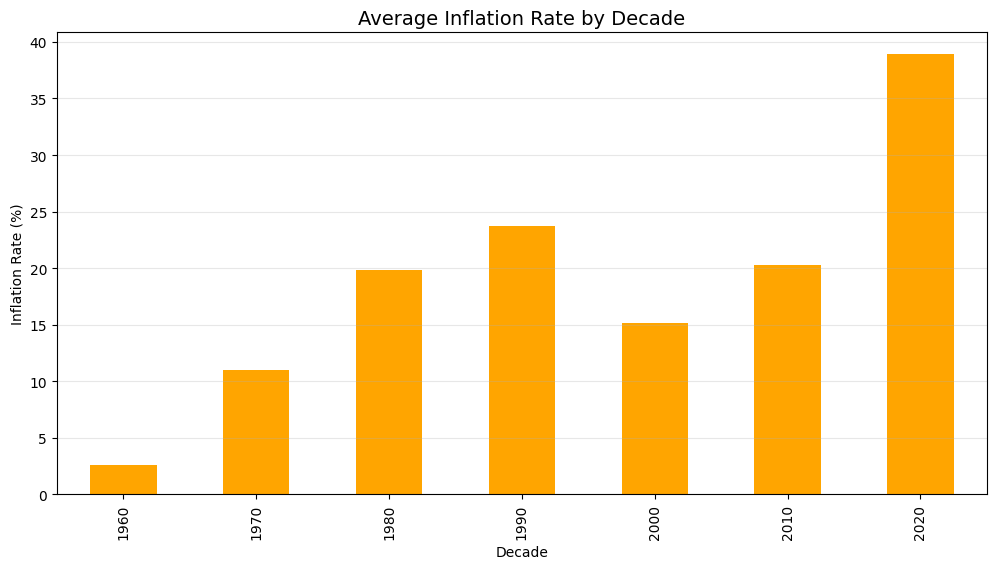

In [75]:
decade_inflation = df.groupby("Decade")["Inflation_Rate_Percent"].mean()

plt.figure(figsize=(12, 6))
decade_inflation.plot(kind="bar", color="orange")
plt.title("Average Inflation Rate by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Inflation Rate (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **⚖️ 3. Average Trade Openness by Decade**
**🔍 Insight**

- Shows global integration trends over decades

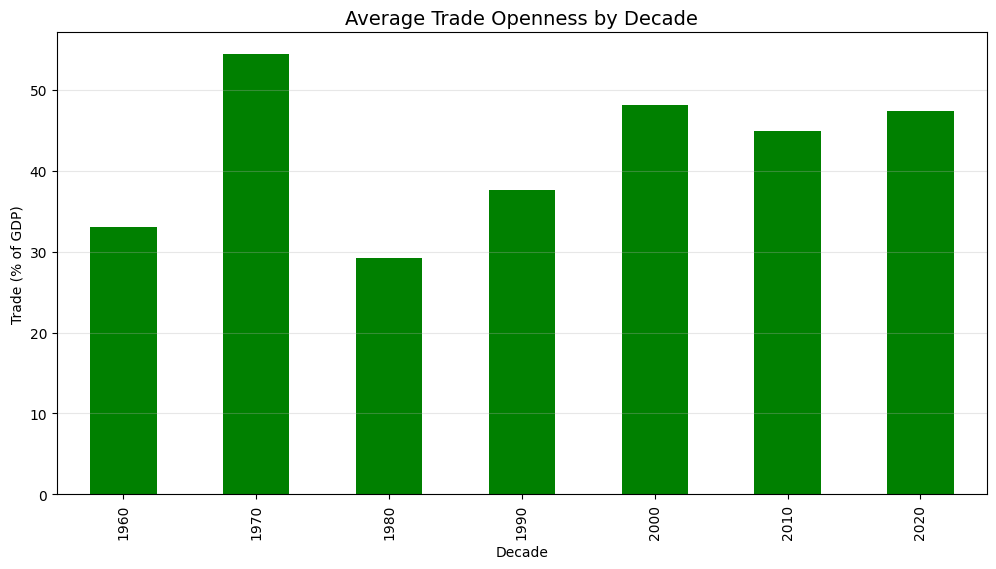

In [76]:
decade_trade = df.groupby("Decade")["Trade_Percent_GDP"].mean()

plt.figure(figsize=(12, 6))
decade_trade.plot(kind="bar", color="green")
plt.title("Average Trade Openness by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Trade (% of GDP)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **📊 4. Average Industry Share by Decade**
**🔍 Insight**

- Structural changes in economy
- Industrialization vs services/other sectors

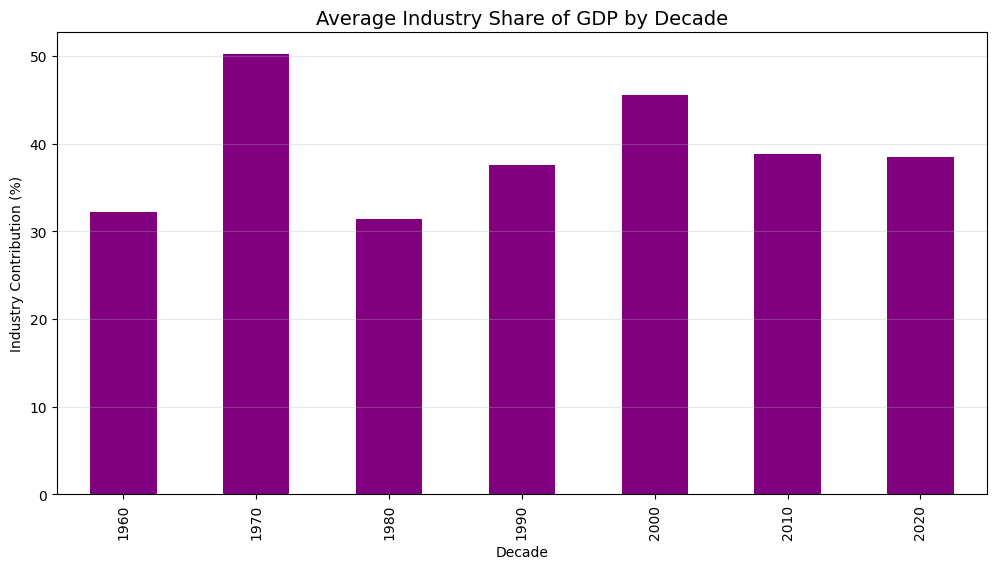

In [77]:
decade_industry = df.groupby("Decade")["Industry_Value_Added_Percent_GDP"].mean()

plt.figure(figsize=(12, 6))
decade_industry.plot(kind="bar", color="purple")
plt.title("Average Industry Share of GDP by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Industry Contribution (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()

### **🔁 5. Combined Decade-Wise Comparison (Multi-Indicator)**
**🔍 Insight**

- Compare multiple indicators side by side
- Best for storytelling

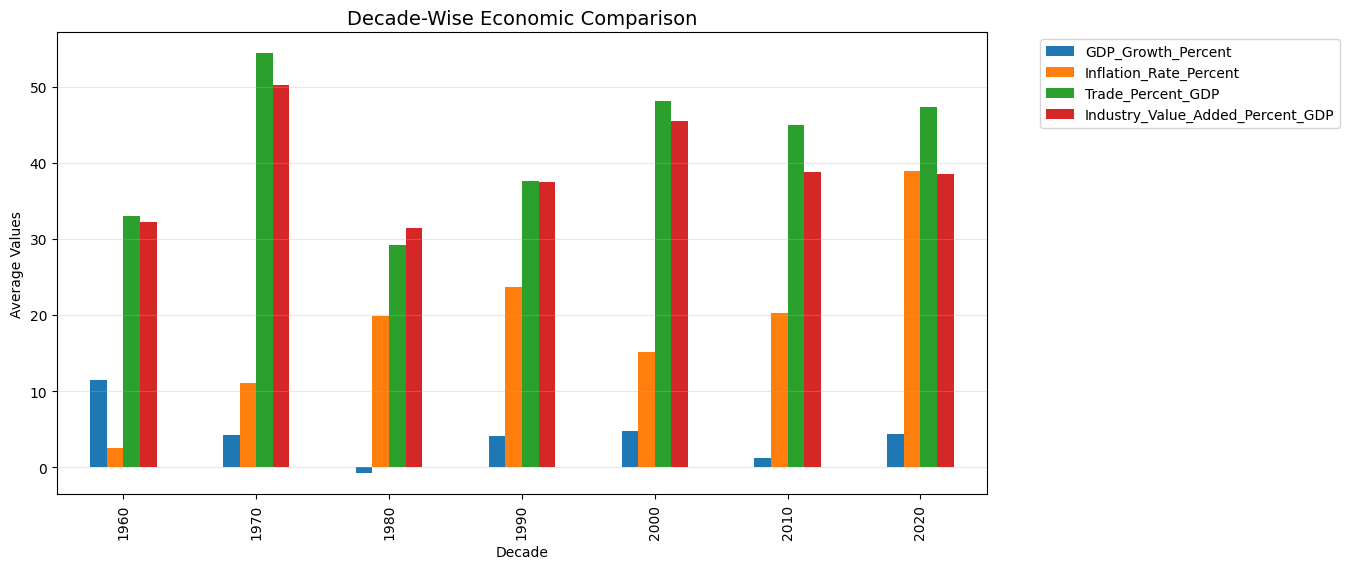

In [78]:
decade_summary = df.groupby("Decade")[["GDP_Growth_Percent", "Inflation_Rate_Percent",
                                       "Trade_Percent_GDP", "Industry_Value_Added_Percent_GDP"]].mean()

decade_summary.plot(kind="bar", figsize=(12, 6))
plt.title("Decade-Wise Economic Comparison", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average Values")
plt.grid(axis="y", alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **📊 6. Heatmap of Decade Averages** 
**🔍 Insight**

- Visualize patterns in a single glance
- Highly eye-catching for Kaggle notebooks

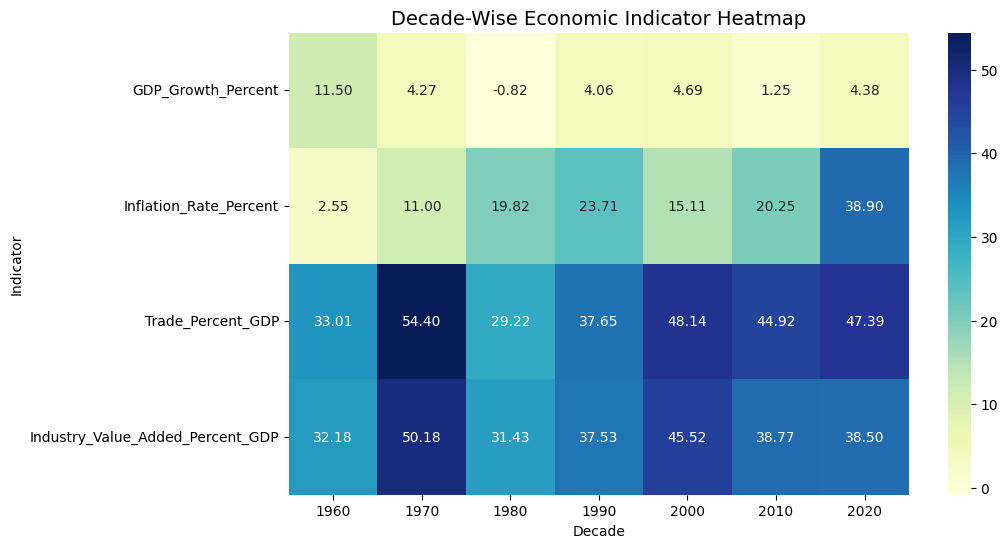

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(decade_summary.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Decade-Wise Economic Indicator Heatmap", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Indicator")
plt.show()

# **🚨 12. Anomaly & Crisis Year Detection**

### **📊 1. Prepare Key Indicators for Anomaly Detection**

In [80]:
anomaly_cols = ["GDP_Growth_Percent", "Inflation_Rate_Percent", "Trade_Balance", "Official_Exchange_Rate"]
# df["Trade_Balance"] = df["Exports_USD"] - df["Imports_USD"]   # Already Created

df[anomaly_cols] = df[anomaly_cols].fillna(method="ffill")

### **📊 2. Z-Score Based Anomaly Detection**
**🔍 Insight**

- Identify outlier years
- Easy to highlight crises

In [81]:
from scipy.stats import zscore

# Compute z-scores
z_scores = df[anomaly_cols].apply(zscore)

# Detect anomalies (abs(z) > 2)
anomalies = z_scores[(np.abs(z_scores) > 2).any(axis=1)]
print("Anomaly Years:\n", df.loc[anomalies.index, ["Year"] + anomaly_cols])

Anomaly Years:
     Year  GDP_Growth_Percent  Inflation_Rate_Percent  Trade_Balance  \
35  1995            2.401045               49.655986   7.914318e+09   
47  2007            8.155774               17.341040   2.727917e+10   
51  2011            2.645718               26.293386   5.439807e+10   
58  2018           -3.747960               18.014118   1.097326e+10   
59  2019           -2.361435               39.907346  -1.378854e+10   
60  2020            4.441809               30.594139  -1.995678e+10   
61  2021            4.130897               43.389016   5.564558e+09   
62  2022            4.352811               43.488464   9.361488e+09   
63  2023            5.332351               44.579186  -7.092579e+09   
64  2024            3.663121               32.455871  -2.356864e+10   

    Official_Exchange_Rate  
35             1748.350246  
47             9281.151828  
51            10616.306644  
58            40864.329010  
59            42000.000000  
60            42000.000000  

### **📈 3. Plot GDP Growth Anomalies**

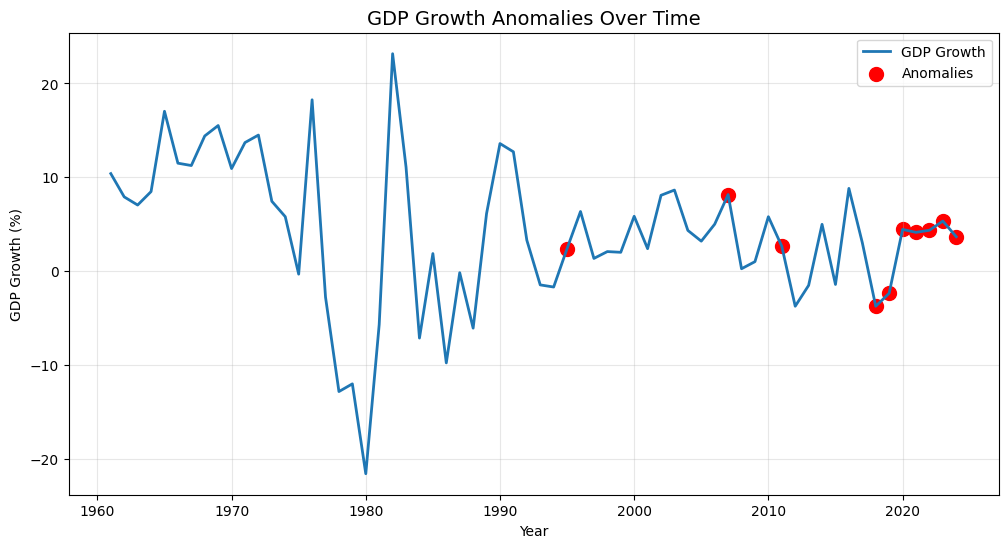

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")

# Highlight anomalies
plt.scatter(df.loc[anomalies.index, "Year"], df.loc[anomalies.index, "GDP_Growth_Percent"], 
            color="red", s=100, label="Anomalies")

plt.title("GDP Growth Anomalies Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📉 4. Plot Inflation Anomalies**

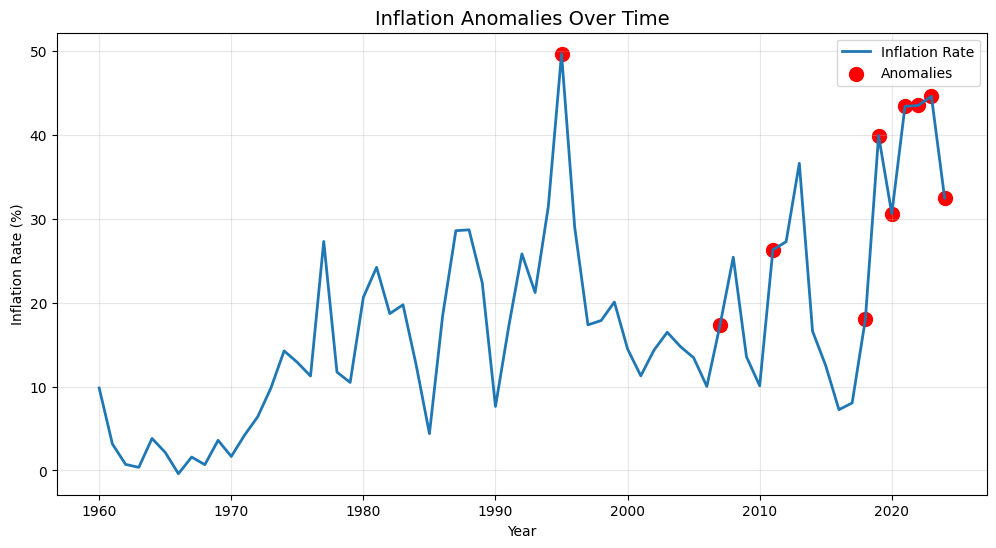

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Inflation_Rate_Percent"], linewidth=2, label="Inflation Rate")
plt.scatter(df.loc[anomalies.index, "Year"], df.loc[anomalies.index, "Inflation_Rate_Percent"], 
            color="red", s=100, label="Anomalies")
plt.title("Inflation Anomalies Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **⚖️ 5. Trade Balance Anomalies**

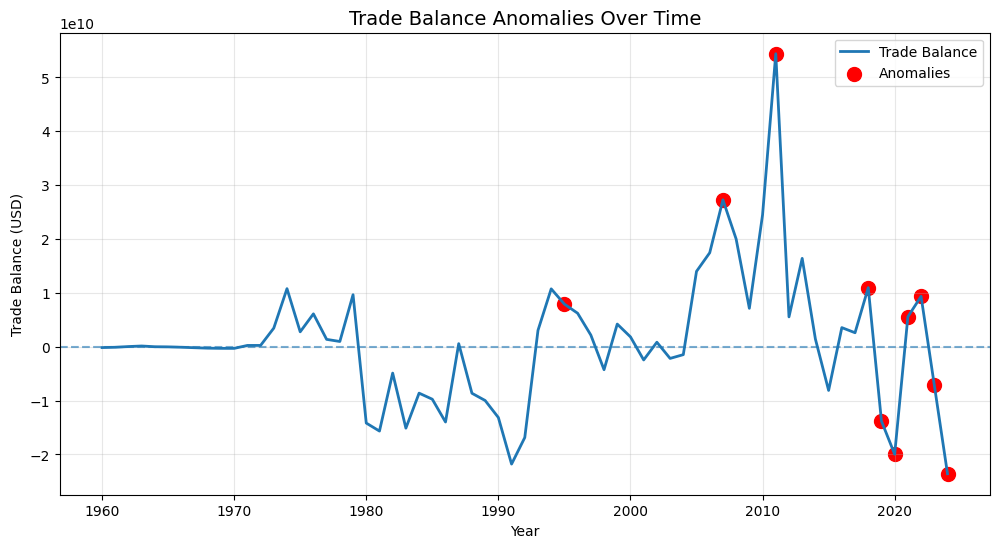

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Trade_Balance"], linewidth=2, label="Trade Balance")
plt.scatter(df.loc[anomalies.index, "Year"], df.loc[anomalies.index, "Trade_Balance"], 
            color="red", s=100, label="Anomalies")
plt.axhline(0, linestyle="--", alpha=0.6)
plt.title("Trade Balance Anomalies Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **🔁 6. Multi-Indicator Anomaly Heatmap**
**🔍 Insight**

- Visual comparison of all anomalies
- Instant “crisis map”

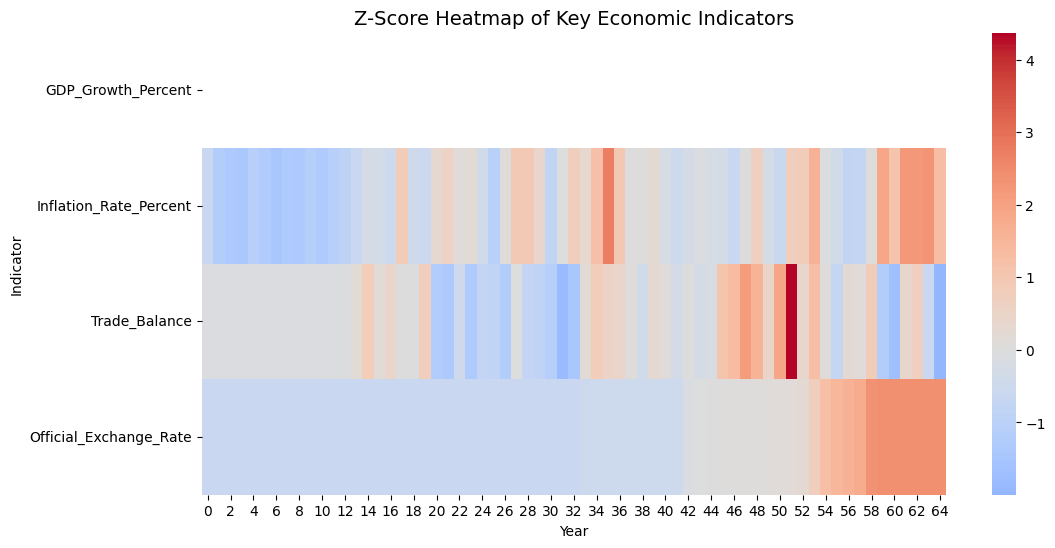

In [85]:
plt.figure(figsize=(12, 6))
sns.heatmap(z_scores.T, cmap="coolwarm", center=0, annot=False)
plt.title("Z-Score Heatmap of Key Economic Indicators", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Indicator")
plt.show()

### **🏁 7. Highlight Top Crisis Years**

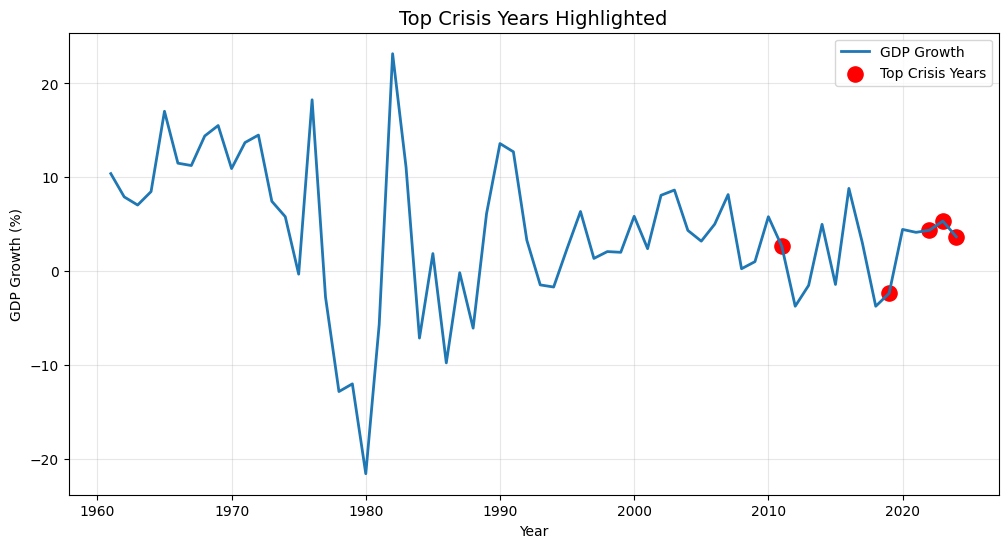

In [86]:
top_crises = z_scores.abs().sum(axis=1).sort_values(ascending=False).head(5).index
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["GDP_Growth_Percent"], linewidth=2, label="GDP Growth")
plt.scatter(df.loc[top_crises, "Year"], df.loc[top_crises, "GDP_Growth_Percent"], 
            color="red", s=120, label="Top Crisis Years")
plt.title("Top Crisis Years Highlighted", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---

#  **Thank You!**  

Thank you for exploring this **comprehensive EDA of Iran’s economic indicators** with me!  

I hope this notebook helped you understand:  
- The **long-term growth story** of Iran 🕰️  
- How GDP growth translated (or didn’t) into **citizen prosperity** 💰  
- Periods of **economic stress, crises, and anomalies** 🚨  
- Insights into **trade, industrialization, and population dynamics** 📦🏭👥  
- **Volatility, stability, and decade-wise patterns** 📊🧪  

If you enjoyed this notebook:  
- 💬 **Comment** your thoughts or questions  
- 🔗 **Share** it with others who love data and macroeconomics  

Stay curious, keep analyzing, and happy coding! 🧠💡🚀  

---
